In [323]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns

In [324]:
results = pd.read_csv('results.csv')
results = results.query("simp_algorithm == ['OS','RDP','VW','BU_1', 'BU_2']")
results["dataset"] = results["dataset"].apply(lambda x: x.replace("TEST_normalized", ""))
results["model"] = results["model"].apply(lambda x: x.split(".")[0].replace("_norm", ""))
results.head(5)

,dataset,model,simp_algorithm,performance,comp@loy=0.8,time
0,Adiac,cnn,OS,0.92,0.0903560214964461,0.0
1,Adiac,cnn,RDP,0.83,0.0944560291671442,0.0
2,Adiac,cnn,VW,0.87,0.106135063164992,0.0
3,Adiac,cnn,BU_1,0.82,0.0895194486965223,0.0
4,Adiac,cnn,BU_2,0.76,0.173324611678759,0.0


In [325]:
datasets_paths = [dir for dir in os.listdir('.') if os.path.isdir(dir)]
models_paths = [os.path.join(dir, 'models.csv') for dir in datasets_paths if os.path.isfile(os.path.join(dir, 'models.csv'))]
datasets_models = dict(zip(datasets_paths, models_paths))
datasets_models = {dataset: pd.read_csv(path) for dataset, path in datasets_models.items()}

models_df = pd.DataFrame()
for dataset, models in datasets_models.items():
    models['dataset'] = dataset
    models_df = pd.concat([models_df, models], ignore_index=True)

#models_df["train_acc"] = models_df["train_acc"].astype(float)
#models_df["val_acc"] = models_df["val_acc"].astype(float)
#models_df["test_acc"] = models_df["test_acc"].astype(float)
print(models_df.head(6))


            model_type  train_acc  val_acc  test_acc                dataset
0        decision-tree       0.78     0.20      0.53                    CBF
1  logistic-regression       0.78     0.20      0.33                    CBF
2                  knn       1.00     0.60      0.76                    CBF
3                  cnn       0.97     0.39      0.91                    CBF
4        decision-tree       1.00     0.33      0.60  SonyAIBORobotSurface1
5  logistic-regression       0.75     0.33      0.43  SonyAIBORobotSurface1


In [326]:
metadata = pd.read_csv("../data/DataSummary.csv")
metadata = metadata.rename(columns={"Name": "dataset"})
metadata = metadata.drop("Data donor/editor", axis=1)
print(metadata.head(5))


   ID       Type    dataset  Train   Test   Class  Length  ED (w=0)  \
0   1      Image      Adiac     390    391     37     176      0.39   
1  90  Simulated        BME      30    150      3     128      0.17   
2   7  Simulated        CBF      30    900      3     128      0.15   
3  91    Traffic  Chinatown      20    343      2      24      0.05   
4  92      Image       Crop    7200  16800     24      46      0.29   

  DTW (learned_w)   DTW (w=100)  Default rate Stationary  Seasonal  Entropy  
0       0.3913 (3)     3.96e-01          0.96       True      True     0.27  
1       0.0200 (4)     1.00e-01          0.67      False      True     0.12  
2      0.0044 (11)     3.30e-03          0.66      False     False     0.83  
3       0.0466 (0)     4.37e-02          0.27      False     False     0.23  
4       0.2883 (0)     3.35e-01          0.96      False     False     0.37  


## All Results

In [327]:
datasets = [dataset.replace("TEST_normalized", "") for dataset in results['dataset'].unique()]
print(f"List of all Datasets {' '.join(datasets)}")
#print(f"List of all Datasets {datasets}")
print(f"Number of Datasets: {len(results['dataset'].unique())}")
print(results['model'].unique())
print(len(results['model'].unique()))
print(results['simp_algorithm'].unique())
print(len(results['simp_algorithm'].unique()))

List of all Datasets Adiac BME CBF Chinatown DistalPhalanxOutlineAgeGroup DistalPhalanxOutlineCorrect DistalPhalanxTW ECG200 ECG5000 ECGFiveDays ElectricDevices FacesUCR GunPointAgeSpan GunPointOldVersusYoung ItalyPowerDemand MedicalImages MiddlePhalanxOutlineAgeGroup MiddlePhalanxOutlineCorrect MiddlePhalanxTW MoteStrain PhalangesOutlinesCorrect Plane ProximalPhalanxOutlineAgeGroup ProximalPhalanxOutlineCorrect ProximalPhalanxTW SmoothSubspace SonyAIBORobotSurface1 SwedishLeaf TwoLeadECG TwoPatterns UMD Wafer
Number of Datasets: 32
['cnn' 'decision-tree' 'logistic-regression' 'knn']
4
['OS' 'RDP' 'VW' 'BU_1' 'BU_2']
5


#### Sum AULC

In [328]:
os_alg_sum_all = results.query('simp_algorithm == "OS"')["performance"].sum()
rdp_alg_sum_all = results.query('simp_algorithm == "RDP"')["performance"].sum()
bu_alg_sum_all = results.query('simp_algorithm == "BU_1"')["performance"].sum()
bu_2_alg_sum_all = results.query('simp_algorithm == "BU_2"')["performance"].sum()
vw_alg_sum_all = results.query('simp_algorithm == "VW"')["performance"].sum()
print("Sum of AULC per algorithm")
print("OS: ", os_alg_sum_all)
print("RDP: ", rdp_alg_sum_all)
print("BU_1: ", bu_alg_sum_all)
print("BU_2: ", bu_2_alg_sum_all)
print("VW: ", vw_alg_sum_all)

Sum of AULC per algorithm
OS:  74.05529347310491
RDP:  75.37303308550787
BU_1:  77.58140345543245
BU_2:  26.262069185948487
VW:  69.7158990401033


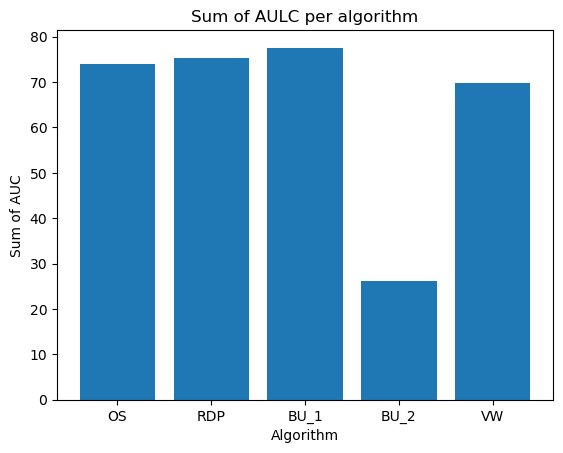

In [329]:
sum_auc = [os_alg_sum_all, rdp_alg_sum_all, bu_alg_sum_all,bu_2_alg_sum_all, vw_alg_sum_all]
plt.bar(['OS', 'RDP', 'BU_1', 'BU_2', 'VW'],sum_auc)
plt.title('Sum of AULC per algorithm')
plt.xlabel('Algorithm')
plt.ylabel('Sum of AUC')
plt.show()

#### Mean AULC

In [330]:
os_alg_mean_all = results.query('simp_algorithm == "OS"')["performance"].mean()
rdp_alg_mean_all = results.query('simp_algorithm == "RDP"')["performance"].mean()
bu_alg_mean_all = results.query('simp_algorithm == "BU_1"')["performance"].mean()
bu_2_alg_mean_all = results.query('simp_algorithm == "BU_2"')["performance"].mean()
vw_alg_mean_all = results.query('simp_algorithm == "VW"')["performance"].mean()
print("Mean of AULC per algorithm")
print("OS: ", os_alg_mean_all)
print("RDP: ", rdp_alg_mean_all)
print("BU_1: ", bu_alg_mean_all)
print("BU_2: ", bu_2_alg_mean_all)
print("VW: ", vw_alg_mean_all)

Mean of AULC per algorithm
OS:  0.8922324514831917
RDP:  0.8867415657118572
BU_1:  0.912722393593323
BU_2:  0.8206896620608902
VW:  0.820187047530627


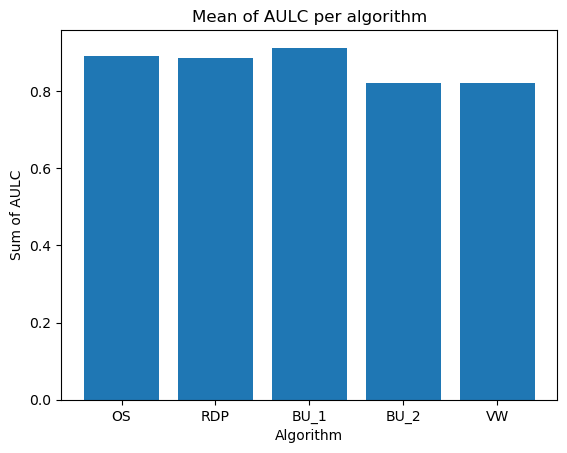

In [331]:
sum_auc = [os_alg_mean_all, rdp_alg_mean_all, bu_alg_mean_all, bu_2_alg_mean_all, vw_alg_mean_all]
plt.bar(['OS', 'RDP', 'BU_1','BU_2', 'VW'],sum_auc)
plt.title('Mean of AULC per algorithm')
plt.xlabel('Algorithm')
plt.ylabel('Sum of AULC')
plt.show()

#### Mean AULC Per Alg and Model

In [332]:
os_alg_all_per_model = results.query('simp_algorithm == "OS"').groupby("model")["performance"].mean()
rdp_alg_all_per_model = results.query('simp_algorithm == "RDP"').groupby("model")["performance"].mean()
bu_alg_all_per_model = results.query('simp_algorithm == "BU_1"').groupby("model")["performance"].mean()
bu_2_alg_all_per_model = results.query('simp_algorithm == "BU_2"').groupby("model")["performance"].mean()
vw_alg_all_per_model = results.query('simp_algorithm == "VW"').groupby("model")["performance"].mean()
print("Mean of AUC per algorithm and model")
print("OS: ", os_alg_all_per_model)
print("RDP: ", rdp_alg_all_per_model)
print("BU_1: ", bu_alg_all_per_model)
print("BU_2: ", bu_2_alg_all_per_model)
print("VC: ", vw_alg_all_per_model)

Mean of AUC per algorithm and model
OS:  model
cnn                    0.90
decision-tree          0.89
knn                    0.89
logistic-regression    0.89
Name: performance, dtype: float64
RDP:  model
cnn                    0.89
decision-tree          0.89
knn                    0.89
logistic-regression    0.89
Name: performance, dtype: float64
BU_1:  model
cnn                    0.91
decision-tree          0.91
knn                    0.91
logistic-regression    0.91
Name: performance, dtype: float64
BU_2:  model
cnn    0.82
Name: performance, dtype: float64
VC:  model
cnn                    0.86
decision-tree          0.80
knn                    0.80
logistic-regression    0.80
Name: performance, dtype: float64


/tmp/ipykernel_43419/973327664.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0, 0].set_xticklabels(os_alg_all_per_model.index, rotation=10)
/tmp/ipykernel_43419/973327664.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0, 1].set_xticklabels(os_alg_all_per_model.index, rotation=10)
/tmp/ipykernel_43419/973327664.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1, 0].set_xticklabels(bu_alg_all_per_model.index, rotation=10)
/tmp/ipykernel_43419/973327664.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1, 1].set_xticklabels(vw_alg_all_per_model.index, rotation=10)
/tmp/ipykernel_43419/973327664.py:23: UserWarning: set_ticklabels(

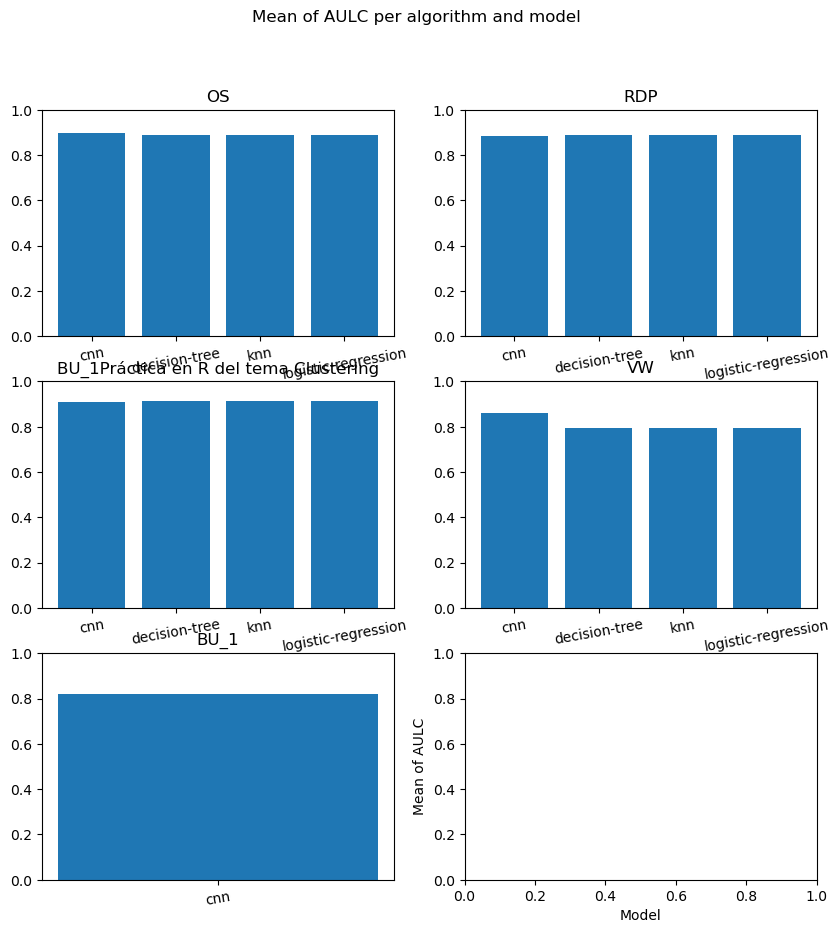

In [333]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
ax[0, 0].bar(os_alg_all_per_model.index, os_alg_all_per_model.values)
ax[0, 0].set_title('OS')
ax[0, 0].set_xticklabels(os_alg_all_per_model.index, rotation=10)
ax[0, 0].set_ylim(0, 1)

ax[0, 1].bar(rdp_alg_all_per_model.index, rdp_alg_all_per_model.values)
ax[0, 1].set_xticklabels(os_alg_all_per_model.index, rotation=10)
ax[0, 1].set_title('RDP')
ax[0, 1].set_ylim(0, 1)

ax[1, 0].bar(bu_alg_all_per_model.index, bu_alg_all_per_model.values)
ax[1, 0].set_xticklabels(bu_alg_all_per_model.index, rotation=10)
ax[1, 0].set_title('BU_1Práctica en R del tema Clustering')
ax[1, 0].set_ylim(0, 1)

ax[1, 1].bar(vw_alg_all_per_model.index, vw_alg_all_per_model.values)
ax[1, 1].set_xticklabels(vw_alg_all_per_model.index, rotation=10)
ax[1, 1].set_title('VW')
ax[1, 1].set_ylim(0, 1)

ax[2, 0].bar(bu_2_alg_all_per_model.index, bu_2_alg_all_per_model.values)
ax[2, 0].set_xticklabels(bu_alg_all_per_model.index, rotation=10)
ax[2, 0].set_title('BU_1')
ax[2, 0].set_ylim(0, 1)

plt.suptitle('Mean of AULC per algorithm and model')
plt.xlabel('Model')
plt.ylabel('Mean of AULC')
plt.show()


## Model Performance

In [334]:
#Perfromance of models
models_mean_perf_train = models_df.groupby("model_type")["train_acc"].mean()
models_mean_perf_train

model_type
cnn                    0.91
decision-tree          0.67
knn                    1.00
logistic-regression    0.56
Name: train_acc, dtype: float64

#### Train Accuracy

Text(0, 0.5, 'Mean of Train Accuracy')

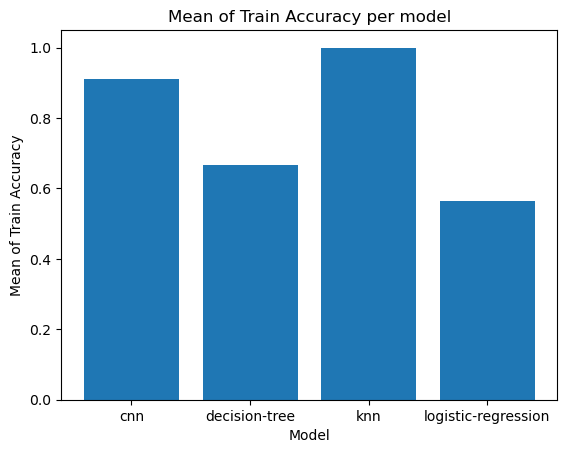

In [335]:
plt.bar(models_mean_perf_train.index, models_mean_perf_train.values) #type: ignore 
plt.title('Mean of Train Accuracy per model')
plt.xlabel('Model')
plt.ylabel('Mean of Train Accuracy')

#### Validation Accuracy

In [336]:
models_mean_perf_val = models_df.groupby("model_type")["val_acc"].mean()
models_mean_perf_val

model_type
cnn                    0.73
decision-tree          0.45
knn                    0.64
logistic-regression    0.46
Name: val_acc, dtype: float64

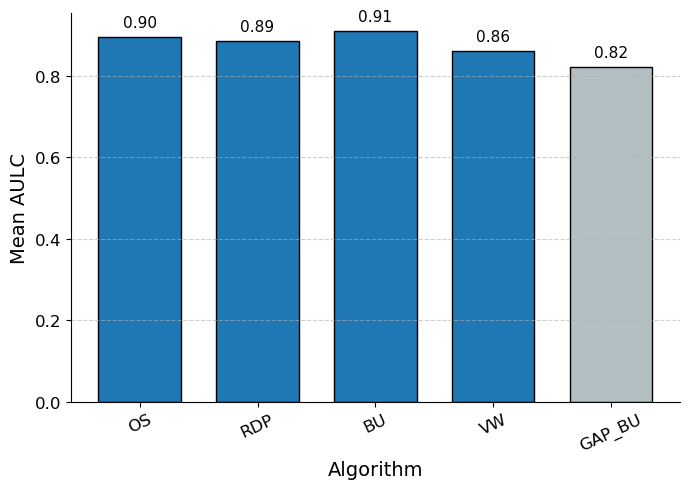

In [337]:
mean_auc_cnn = [os_alg_mean_cnn, rdp_alg_mean_cnn, bu_alg_mean_cnn, vw_alg_mean_cnn, bu_2_alg_mean_cnn]
alg_labels = ['OS', 'RDP', 'BU', 'VW', 'GAP_BU']

# Colors: last bar (GAP_BU) in lighter gray, rest in blue
bar_colors = ['C0', 'C0', 'C0', 'C0', '#b4bfc4']  # Matplotlib's 'C0' + light gray

fig, ax = plt.subplots(figsize=(7, 5))

bars = ax.bar(
    alg_labels,
    mean_auc_cnn,
    color=bar_colors,
    edgecolor='black',
    width=0.7,
)

ax.set_xlabel('Algorithm', fontsize=14)
ax.set_ylabel('Mean AULC', fontsize=14)

ax.tick_params(axis='x', rotation=25, labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Dashed y-grid
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Remove top & right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Annotate values above bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f"{height:.2f}", 
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5), textcoords="offset points",
                ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.savefig("../plots/mean_auc_cnn.png")  # Save if needed
plt.show()

### By Class

In [338]:
dataset_class = metadata[["dataset", "Class"]].to_dict()
dataset_class_dict = pd.Series(metadata["Class"].values, index=metadata["dataset"].values).to_dict()
print(dataset_class_dict)
#models_df["class"] = models_df["dataset"].map()

{'Adiac': 37, 'BME': 3, 'CBF': 3, 'Chinatown': 2, 'Crop': 24, 'DistalPhalanxOutlineAgeGroup': 3, 'DistalPhalanxOutlineCorrect': 2, 'DistalPhalanxTW': 6, 'ECG200': 2, 'ECG5000': 5, 'ECGFiveDays': 2, 'ElectricDevices': 7, 'FaceAll': 14, 'FacesUCR': 14, 'GunPoint': 2, 'GunPointAgeSpan': 2, 'GunPointMaleVersusFemale': 2, 'GunPointOldVersusYoung': 2, 'ItalyPowerDemand': 2, 'MedicalImages': 10, 'MiddlePhalanxOutlineAgeGroup': 3, 'MiddlePhalanxOutlineCorrect': 2, 'MiddlePhalanxTW': 6, 'MoteStrain': 2, 'PhalangesOutlinesCorrect': 2, 'Plane': 7, 'PowerCons': 2, 'ProximalPhalanxOutlineAgeGroup': 3, 'ProximalPhalanxOutlineCorrect': 2, 'ProximalPhalanxTW': 6, 'SmoothSubspace': 3, 'SonyAIBORobotSurface1': 2, 'SonyAIBORobotSurface2': 2, 'SwedishLeaf': 15, 'SyntheticControl': 6, 'TwoLeadECG': 2, 'TwoPatterns': 4, 'UMD': 3, 'Wafer': 2}


In [339]:
models_class_df = models_df
models_class_df["class"] = models_class_df["dataset"].map(dataset_class_dict)
models_class_df

,model_type,train_acc,val_acc,test_acc,dataset,class
0,decision-tree,0.78,0.20,0.53,CBF,3
1,logistic-regression,0.78,0.20,0.33,CBF,3
2,knn,1.00,0.60,0.76,CBF,3
3,cnn,0.97,0.39,0.91,CBF,3
4,decision-tree,1.00,0.33,0.60,SonyAIBORobotSurface1,2
...,...,...,...,...,...,...
152,cnn,0.79,0.74,0.58,DistalPhalanxTW,6
153,decision-tree,1.00,1.00,1.00,GunPointOldVersusYoung,2
154,logistic-regression,1.00,1.00,1.00,GunPointOldVersusYoung,2
155,knn,1.00,1.00,1.00,GunPointOldVersusYoung,2


#### Train Accuracy

In [340]:
models_mean_perf_train_per_class = models_class_df
models_mean_perf_train_per_class = models_mean_perf_train_per_class.groupby(["model_type", "class"])["train_acc"].mean()

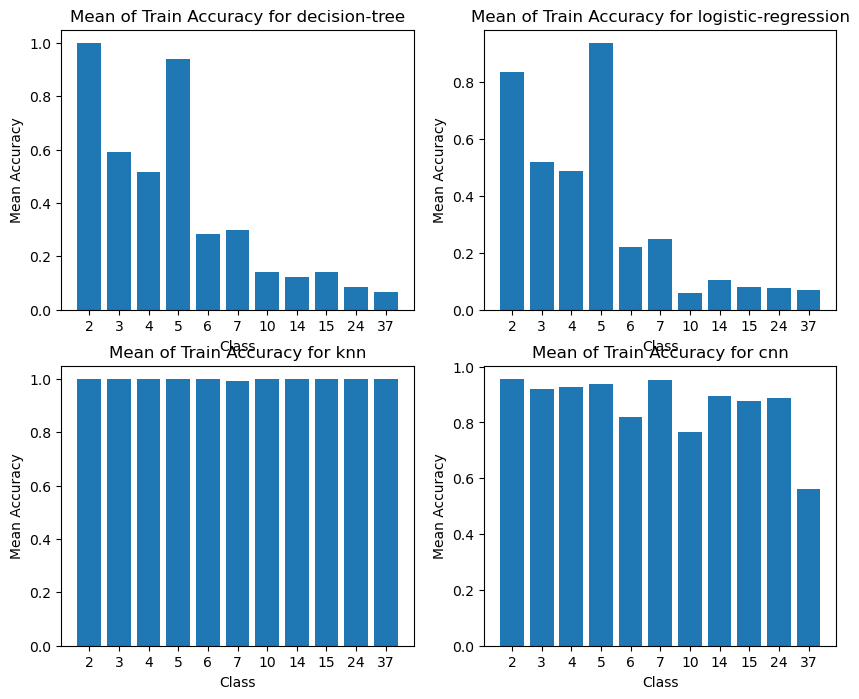

In [341]:
models = models_class_df["model_type"].unique()
num_cols = 2
num_rows = (len(set(models)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, model in enumerate(models):
    model_data = models_mean_perf_train_per_class[model]
    
    x_values = model_data.index.tolist()
    x_values = [str(value) for value in x_values]
    y_values = model_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    
    ax.bar(x_values, y_values)
    ax.set_title(f'Mean of Train Accuracy for {model}')
    ax.set_xlabel('Class')
    ax.set_ylabel('Mean Accuracy')

plt.show()

#### Validation Accuracy

In [342]:
models_mean_perf_val_per_class = models_class_df
models_mean_perf_val_per_class = models_mean_perf_val_per_class.groupby(["model_type", "class"])["val_acc"].mean()

models_perf_dict = {
    model: models_mean_perf_val_per_class[model]
    for model in models_mean_perf_val_per_class.index.get_level_values(0).unique()
}

/tmp/ipykernel_43419/3104160575.py:34: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


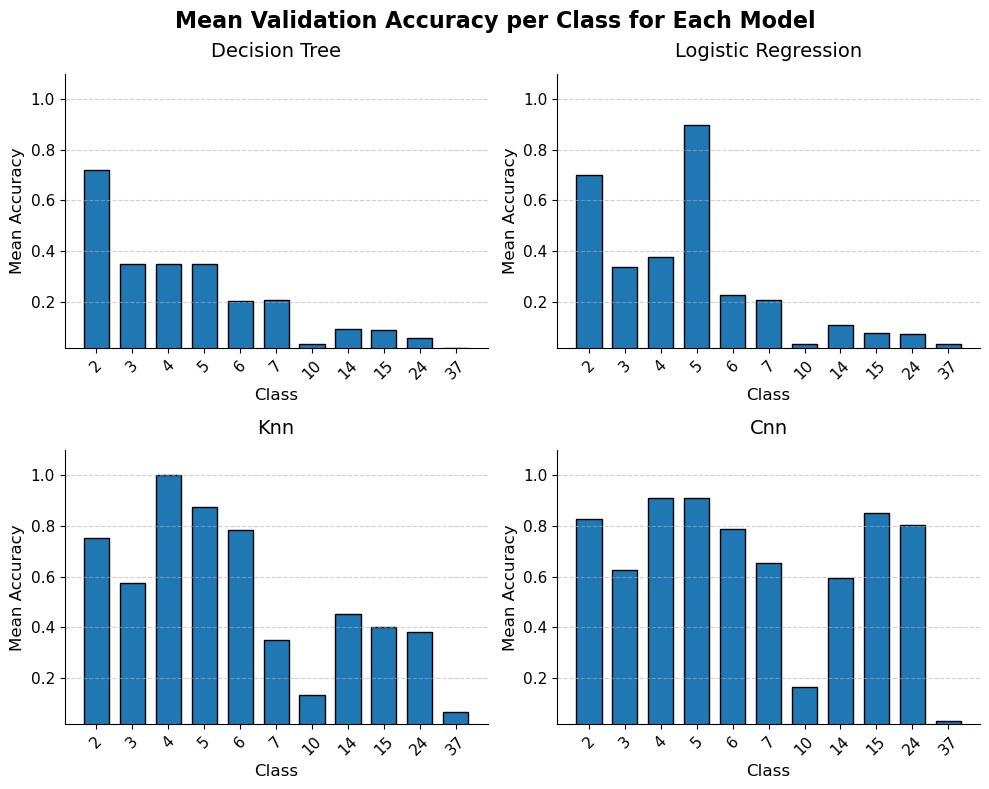

In [343]:
import matplotlib.pyplot as plt

models = models_class_df["model_type"].unique()
num_cols = 2
num_rows = (len(set(models)) + 1) // 2
fig, axs = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 4*num_rows), constrained_layout=True)

axs = axs.flatten()

y_min = min(np.min(ser.values) for ser in models_perf_dict.values())
y_max = max(np.max(ser.values) for ser in models_perf_dict.values())

for i, model in enumerate(models):
    model_data = models_mean_perf_val_per_class[model]    
    x_values = [str(val) for val in model_data.index.tolist()]
    y_values = model_data.values.tolist()
    
    ax = axs[i]
    bars = ax.bar(x_values, y_values, color='C0', edgecolor='black', width=0.7)
    ax.set_title(f'{model.replace("-", " ").title()}', fontsize=14, pad=12)
    ax.set_xlabel('Class', fontsize=12)
    ax.set_ylabel('Mean Accuracy', fontsize=12)
    ax.set_ylim(y_min, y_max * 1.10)
    ax.grid(True, axis='y', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='x', rotation=45, labelsize=11)
    ax.tick_params(axis='y', labelsize=11)

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

fig.suptitle('Mean Validation Accuracy per Class for Each Model', fontsize=16, weight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.90)  
plt.show()


## Only for CNN

In [344]:
results_cnn = results.query('model == "cnn"')
results_cnn.loc[:,'comp@loy=0.8'] = results_cnn['comp@loy=0.8'].astype(float)
print(results_cnn)

    dataset model simp_algorithm  performance comp@loy=0.8  time
0     Adiac   cnn             OS         0.92         0.09   0.0
1     Adiac   cnn            RDP         0.83         0.09   0.0
2     Adiac   cnn             VW         0.87         0.11   0.0
3     Adiac   cnn           BU_1         0.82         0.09   0.0
4     Adiac   cnn           BU_2         0.76         0.17   0.0
..      ...   ...            ...          ...          ...   ...
421   Wafer   cnn             OS         0.99         0.03   0.0
422   Wafer   cnn            RDP         0.97         0.02   0.0
423   Wafer   cnn             VW         0.95          1.0   0.0
424   Wafer   cnn           BU_1         0.99          1.0   0.0
425   Wafer   cnn           BU_2         0.98          1.0   0.0

[160 rows x 6 columns]


#### Sum AULC

In [345]:
os_alg_sum_cnn = results_cnn.query('simp_algorithm == "OS"')["performance"].sum()
rdp_alg_sum_cnn = results_cnn.query('simp_algorithm == "RDP"')["performance"].sum()
bu_alg_sum_cnn = results_cnn.query('simp_algorithm == "BU_1"')["performance"].sum()
bu_2_alg_sum_cnn = results_cnn.query('simp_algorithm == "BU_2"')["performance"].sum()
vw_alg_sum_cnn = results_cnn.query('simp_algorithm == "VW"')["performance"].sum()
print("Sum of AULC per algorithm")
print("OS: ", os_alg_sum_cnn)
print("RDP: ", rdp_alg_sum_cnn)
print("BU_1: ", bu_alg_sum_cnn)
print("BU_2: ", bu_2_alg_sum_cnn)
print("VW: ", vw_alg_sum_cnn)

Sum of AULC per algorithm
OS:  28.65102733473747
RDP:  28.32525906942474
BU_1:  29.097094574954788
BU_2:  26.262069185948487
VW:  27.50800767156301


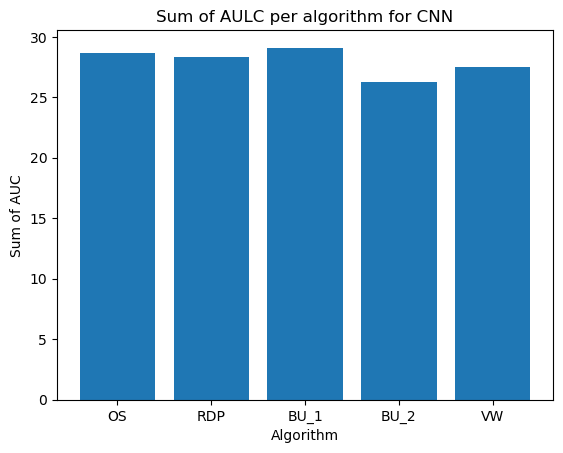

In [346]:
sum_auc = [os_alg_sum_cnn, rdp_alg_sum_cnn, bu_alg_sum_cnn, bu_2_alg_sum_cnn, vw_alg_sum_cnn]
plt.bar(['OS', 'RDP', 'BU_1', 'BU_2', 'VW'],sum_auc)
plt.title('Sum of AULC per algorithm for CNN')
plt.xlabel('Algorithm')
plt.ylabel('Sum of AUC')
plt.show()

#### Mean AULC

In [347]:
os_alg_mean_cnn = results_cnn.query('simp_algorithm == "OS"')["performance"].mean()
rdp_alg_mean_cnn = results_cnn.query('simp_algorithm == "RDP"')["performance"].mean()
bu_alg_mean_cnn = results_cnn.query('simp_algorithm == "BU_1"')["performance"].mean()
bu_2_alg_mean_cnn = results_cnn.query('simp_algorithm == "BU_2"')["performance"].mean()
vw_alg_mean_cnn = results_cnn.query('simp_algorithm == "VW"')["performance"].mean()
print("Mean of AUC per algorithm")
print("OS: ", os_alg_mean_cnn)
print("RDP: ", rdp_alg_mean_cnn)
print("BU_1: ", bu_alg_mean_cnn)
print("BU_2: ", bu_2_alg_mean_cnn)
print("VW: ", vw_alg_mean_cnn)

Mean of AUC per algorithm
OS:  0.895344604210546
RDP:  0.8851643459195231
BU_1:  0.9092842054673371
BU_2:  0.8206896620608902
VW:  0.8596252397363441


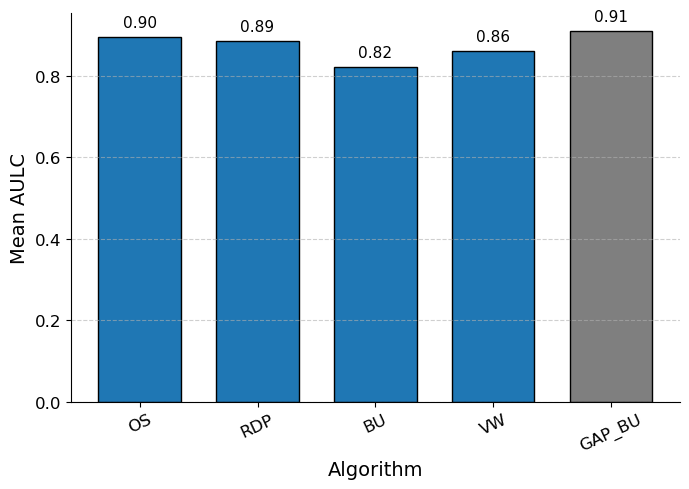

In [348]:
mean_auc_cnn = [os_alg_mean_cnn, rdp_alg_mean_cnn, bu_2_alg_mean_cnn, vw_alg_mean_cnn, bu_alg_mean_cnn]
alg_labels = ['OS', 'RDP', 'BU', 'VW', 'GAP_BU']

bar_colors = ['C0', 'C0', 'C0', 'C0', 'C7']  

fig, ax = plt.subplots(figsize=(7, 5))

bars = ax.bar(
    alg_labels,
    mean_auc_cnn,
    color=bar_colors,
    edgecolor='black',
    width=0.7,
)

ax.set_xlabel('Algorithm', fontsize=14)
ax.set_ylabel('Mean AULC', fontsize=14)

ax.tick_params(axis='x', rotation=25, labelsize=12)
ax.tick_params(axis='y', labelsize=12)

ax.grid(axis='y', linestyle='--', alpha=0.6)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for bar in bars:
    height = bar.get_height()
    ax.annotate(f"{height:.2f}", 
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5), textcoords="offset points",
                ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.savefig("../plots/mean_auc_cnn.png")  
plt.show()

By Loyalty Threshold

In [349]:
os_alg_mean_cnn_comp = np.array(results_cnn.query('simp_algorithm == "OS"')["comp@loy=0.8"], dtype=np.float64).mean()
rdp_alg_mean_cnn_comp = np.array(results_cnn.query('simp_algorithm == "RDP"')["comp@loy=0.8"], dtype=np.float64).mean()
bu_alg_mean_cnn_comp = np.array(results_cnn.query('simp_algorithm == "BU_1"')["comp@loy=0.8"], dtype=np.float64).mean()
bu_2_alg_mean_cnn_comp = np.array(results_cnn.query('simp_algorithm == "BU_2"')["comp@loy=0.8"], dtype=np.float64).mean()
vw_alg_mean_cnn_comp = np.array(results_cnn.query('simp_algorithm == "VW"')["comp@loy=0.8"], dtype=np.float64).mean()
print("Mean Complexity at Loyalty 0.8 per algorithm")
print("OS: ", os_alg_mean_cnn_comp)
print("RDP: ", rdp_alg_mean_cnn_comp)
print("BU_1: ", bu_alg_mean_cnn_comp)
print("BU_2: ", bu_2_alg_mean_cnn_comp)
print("VW: ", vw_alg_mean_cnn_comp)

Mean Complexity at Loyalty 0.8 per algorithm
OS:  0.1603796035642686
RDP:  0.20317960840720564
BU_1:  0.2989122254175249
BU_2:  0.39693766310787293
VW:  0.45798427494870697


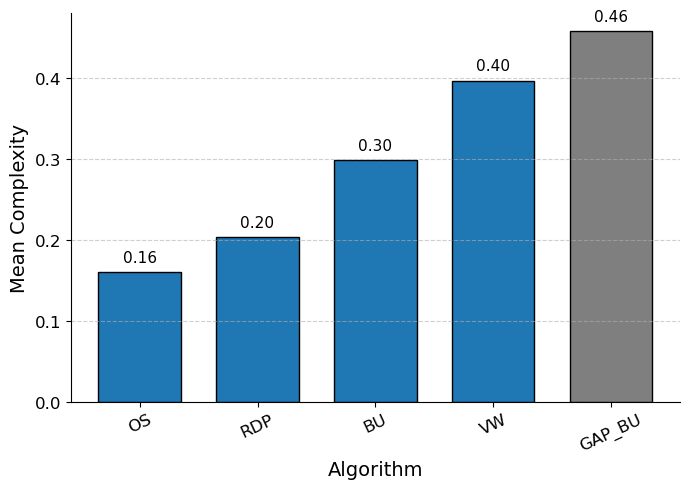

In [350]:
mean_comp_cnn = [os_alg_mean_cnn_comp, rdp_alg_mean_cnn_comp, bu_alg_mean_cnn_comp, bu_2_alg_mean_cnn_comp,vw_alg_mean_cnn_comp]
alg_labels = ['OS', 'RDP', 'BU', 'VW', 'GAP_BU']

bar_colors = ['C0', 'C0', 'C0', 'C0', 'C7']  

fig, ax = plt.subplots(figsize=(7, 5))

bars = ax.bar(
    alg_labels,
    mean_comp_cnn,
    color=bar_colors,
    edgecolor='black',
    width=0.7,
)

ax.set_xlabel('Algorithm', fontsize=14)
ax.set_ylabel('Mean Complexity', fontsize=14)

ax.tick_params(axis='x', rotation=25, labelsize=12)
ax.tick_params(axis='y', labelsize=12)

ax.grid(axis='y', linestyle='--', alpha=0.6)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for bar in bars:
    height = bar.get_height()
    ax.annotate(f"{height:.2f}", 
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5), textcoords="offset points",
                ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

### By Class:

In [351]:
results_cnn_class = results_cnn
results_cnn_class["class"] = results_cnn_class["dataset"].map(dataset_class_dict)
#print(results_cnn_class.head(5))

/tmp/ipykernel_43419/3098996261.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_cnn_class["class"] = results_cnn_class["dataset"].map(dataset_class_dict)


#### AULC Per Alg and Class

In [352]:
results_cnn_alg_class = results_cnn_class.groupby(["simp_algorithm", "class"])["class"].count()
#print(results_cnn_alg_class)

In [353]:
results_cnn_alg_class_mean = results_cnn_class.groupby(["simp_algorithm", "class"])["performance"].mean()
#print(results_cnn_alg_class_mean)
results_cnn_alg_class_std = results_cnn_class.groupby(["simp_algorithm", "class"])["performance"].std()
#print(results_cnn_alg_class_std)


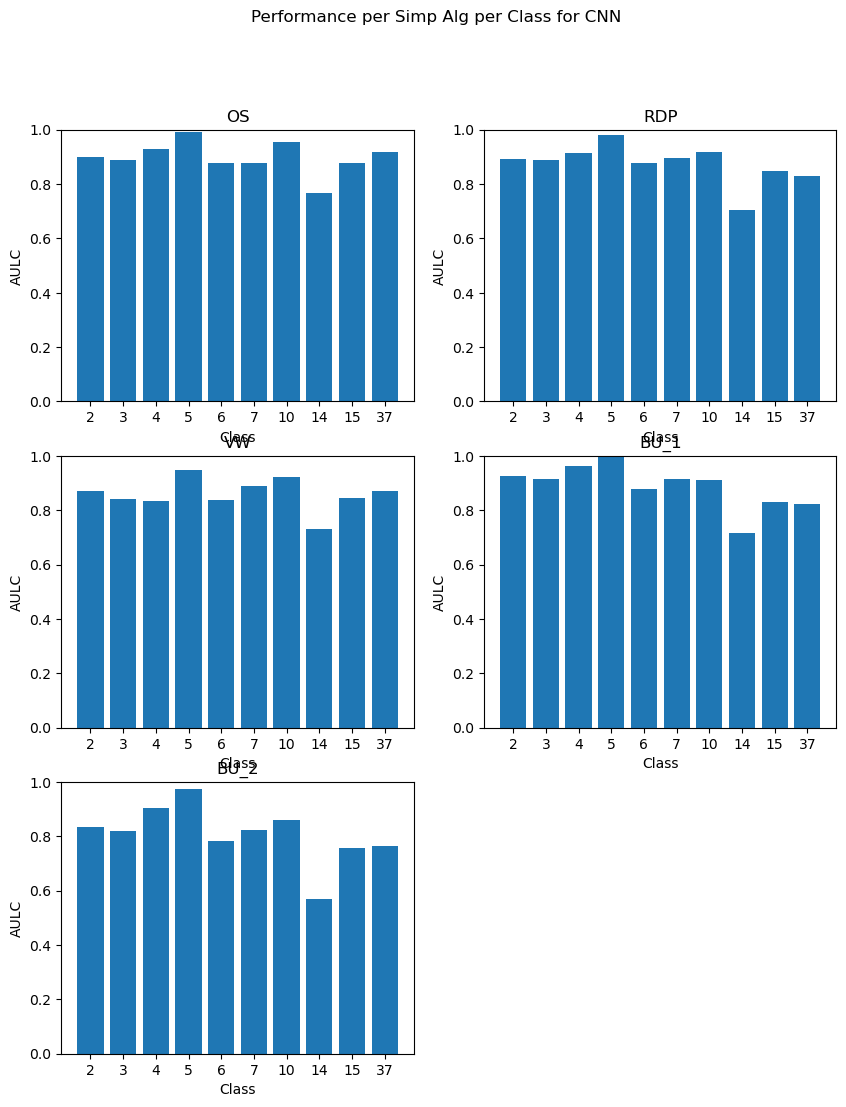

In [354]:
simp_algs = results_cnn_class["simp_algorithm"].unique()
num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_cnn_alg_class_mean[alg]
    
    x_values = simp_alg_data.index.tolist()
    x_values = [str(value) for value in x_values]
    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    
    ax.bar(x_values, y_values)
    
    ax.set_title(f'{alg}')
    ax.set_xlabel('Class')
    ax.set_ylabel('AULC')
    ax.set_ylim(0.0, 1.0)

plt.suptitle("Performance per Simp Alg per Class for CNN")
plt.show()

Binary vs Multicalss

In [355]:
results_cnn_class["class_type"] = results_cnn_class["class"].copy().apply(lambda x: 'binary' if x == 2 else "multiclass")
results_cnn_alg_bin_vs_mc_mean = results_cnn_class.groupby(["simp_algorithm", "class_type"])["performance"].mean()
print(results_cnn_alg_bin_vs_mc_mean)

simp_algorithm  class_type
BU_1            binary        0.93
                multiclass    0.90
BU_2            binary        0.84
                multiclass    0.81
OS              binary        0.90
                multiclass    0.89
RDP             binary        0.89
                multiclass    0.88
VW              binary        0.87
                multiclass    0.85
Name: performance, dtype: float64


/tmp/ipykernel_43419/705144334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_cnn_class["class_type"] = results_cnn_class["class"].copy().apply(lambda x: 'binary' if x == 2 else "multiclass")


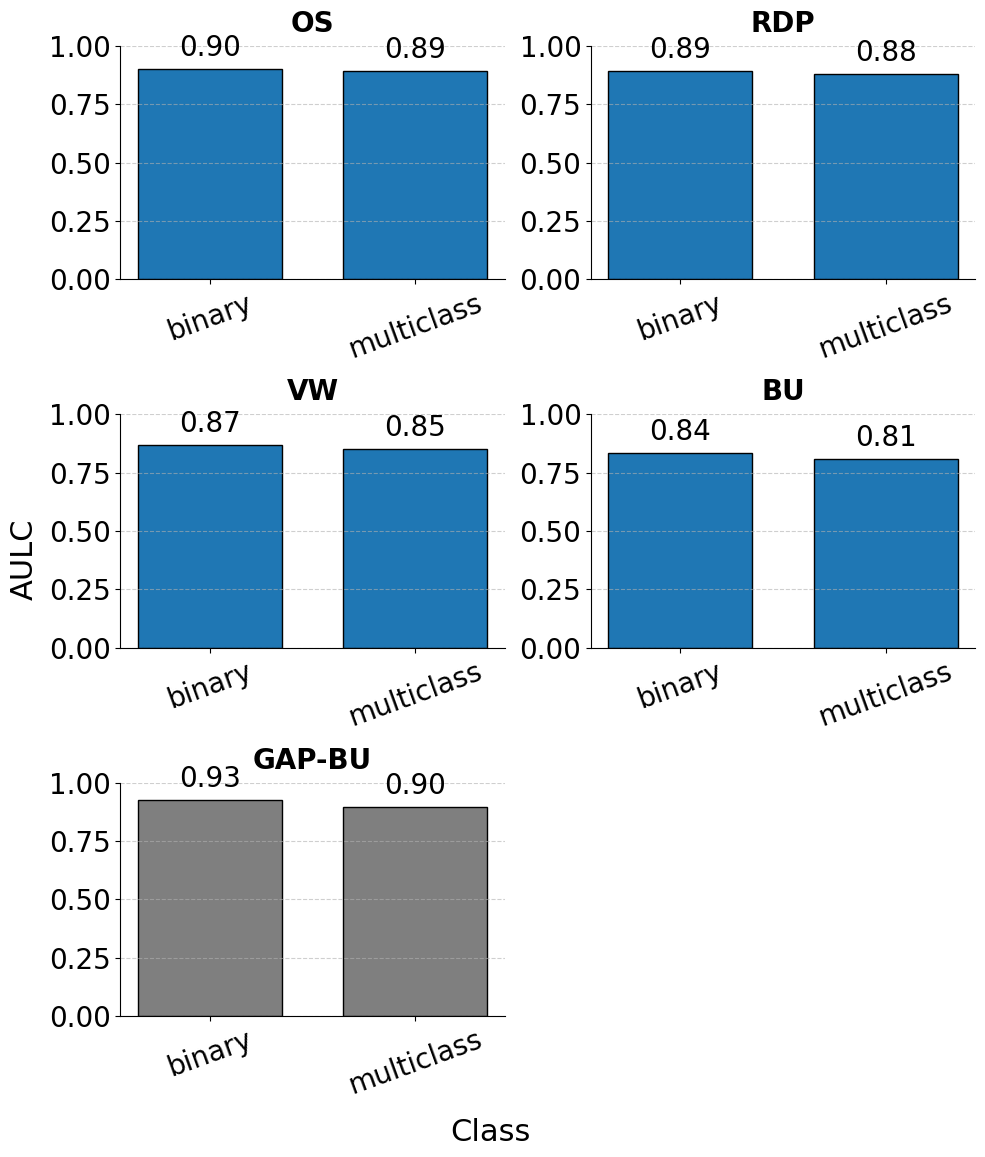

In [356]:

fontsize = 20
simp_algs = ['OS', 'RDP', 'VW', 'BU_2', 'BU_1']
num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_cnn_alg_bin_vs_mc_mean[alg]
    x_values = [str(value) for value in simp_alg_data.index.tolist()]
    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    if alg == 'BU_1':
        bars = ax.bar(x_values, y_values, color='C7', edgecolor='black', width=0.7)
    else:
        bars = ax.bar(x_values, y_values, color='C0', edgecolor='black', width=0.7)

    # Set pretty names
    plot_alg = alg
    if alg == 'BU_2':
        plot_alg = 'BU'
    elif alg == 'BU_1':
        plot_alg = 'GAP-BU'

    ax.set_title(f'{plot_alg.upper()}', fontsize=fontsize, fontweight='bold', pad=10)
    ax.set_ylim(0.0, 1.0)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='x', rotation=20, labelsize=fontsize)
    ax.tick_params(axis='y', labelsize=fontsize)

    for bar in bars:
        height = bar.get_height()
        ax.annotate(
            f"{height:.2f}", 
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 5), textcoords="offset points",
            ha='center', va='bottom', fontsize=fontsize
        )

# Add common x and y labels to the entire figure
fig.supxlabel('Class', fontsize=fontsize+2)
fig.supylabel('AULC', fontsize=fontsize+2)
# Optionally, add a common title as well:
# fig.suptitle("Performance per Simplification Algorithm per Class for CNN", fontsize=fontsize+4, weight='bold', y=1.01)

plt.tight_layout(rect=[0, 0, 1, 0.97])  # provide space for supxlabel/supylabel (tweak as needed)
plt.savefig("../plots/mean_auc_per_class_cnn.png")
plt.show()

By Loyalty Threshold

In [357]:
results_cnn_alg_bin_vs_mc_mean_comp = (results_cnn_class.groupby(["simp_algorithm", "class_type"])["comp@loy=0.8"]).mean()
print(results_cnn_alg_bin_vs_mc_mean_comp)

simp_algorithm  class_type
BU_1            binary        0.41
                multiclass    0.21
BU_2            binary        0.51
                multiclass    0.31
OS              binary        0.17
                multiclass    0.15
RDP             binary        0.26
                multiclass    0.16
VW              binary        0.56
                multiclass    0.38
Name: comp@loy=0.8, dtype: object


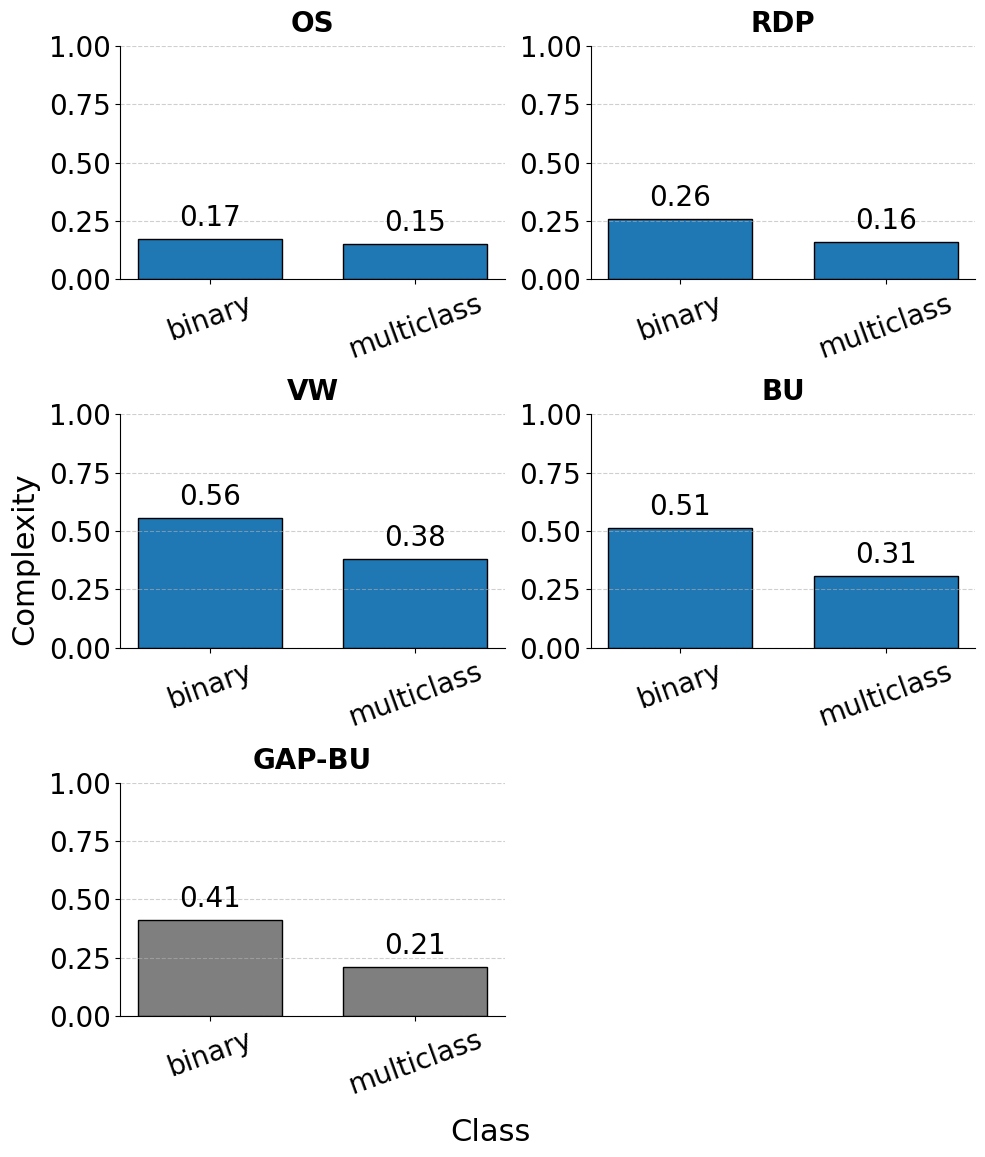

In [358]:

fontsize = 20
simp_algs = ['OS', 'RDP', 'VW', 'BU_2', 'BU_1']
num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_cnn_alg_bin_vs_mc_mean_comp[alg]
    x_values = [str(value) for value in simp_alg_data.index.tolist()]
    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    if alg == 'BU_1':
        bars = ax.bar(x_values, y_values, color='C7', edgecolor='black', width=0.7)
    else:
        bars = ax.bar(x_values, y_values, color='C0', edgecolor='black', width=0.7)

    # Set pretty names
    plot_alg = alg
    if alg == 'BU_2':
        plot_alg = 'BU'
    elif alg == 'BU_1':
        plot_alg = 'GAP-BU'

    ax.set_title(f'{plot_alg.upper()}', fontsize=fontsize, fontweight='bold', pad=10)
    ax.set_ylim(0.0, 1.0)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='x', rotation=20, labelsize=fontsize)
    ax.tick_params(axis='y', labelsize=fontsize)

    for bar in bars:
        height = bar.get_height()
        ax.annotate(
            f"{height:.2f}", 
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 5), textcoords="offset points",
            ha='center', va='bottom', fontsize=fontsize
        )

# Add common x and y labels to the entire figure
fig.supxlabel('Class', fontsize=fontsize+2)
fig.supylabel('Complexity', fontsize=fontsize+2)
# Optionally, add a common title as well:
# fig.suptitle("Performance per Simplification Algorithm per Class for CNN", fontsize=fontsize+4, weight='bold', y=1.01)

plt.tight_layout(rect=[0, 0, 1, 0.97])  # provide space for supxlabel/supylabel (tweak as needed)
plt.savefig("../plots/mean_auc_per_class_cnn.png")
plt.show()

### By length

In [359]:
dataset_lendth = metadata[["dataset", "Length"]].to_dict()
dataset_length_dict = pd.Series(metadata["Length"].values, index=metadata["dataset"].values).to_dict()
#print(dataset_length_dict)
#models_df["class"] = models_df["dataset"].map()

In [360]:
results_cnn_length = results_cnn
results_cnn_length["length"] = results_cnn_length["dataset"].map(dataset_length_dict).copy()
#print(results_cnn_length.head(5))

/tmp/ipykernel_43419/2137824416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_cnn_length["length"] = results_cnn_length["dataset"].map(dataset_length_dict).copy()


In [361]:
results_cnn_alg_length_mean = results_cnn_length.groupby(["simp_algorithm", "length"])["performance"].mean()

print(results_cnn_alg_length_mean)

simp_algorithm  length
BU_1            15        0.96
                24        0.87
                70        0.73
                80        0.90
                82        0.92
                          ... 
VW              140       0.95
                144       0.90
                150       0.95
                152       0.95
                176       0.87
Name: performance, Length: 80, dtype: float64


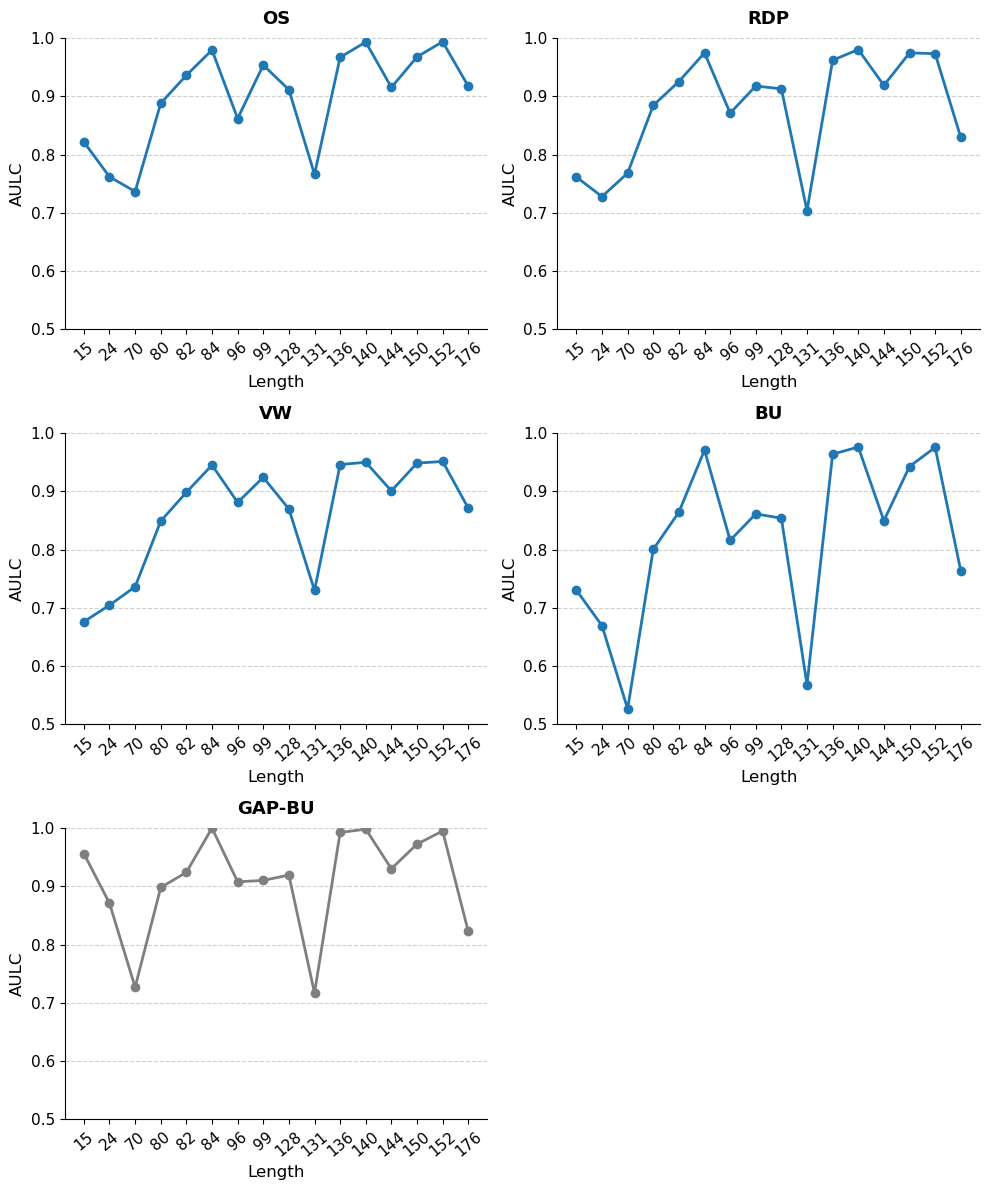

In [362]:
#simp_algs = results_cnn_class["simp_algorithm"].unique()
simp_algs = ['OS', 'RDP', 'VW', 'BU_2', 'BU_1']

num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_cnn_alg_length_mean[alg]
    x_values = [str(value) for value in simp_alg_data.index.tolist()]
    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    if alg == 'BU_1':
        ax.plot(x_values, y_values, marker='o', color='C7', linewidth=2)
    else:
        ax.plot(x_values, y_values, marker='o', color='C0', linewidth=2)

    if alg == 'BU_2':
        alg = 'BU'
    elif alg == 'BU_1':
        alg = 'GAP-BU'

    ax.set_title(f'{alg.upper()}', fontsize=13, fontweight='bold', pad=10)
    ax.set_xlabel('Length', fontsize=12)
    ax.set_ylabel('AULC', fontsize=12)
    ax.set_ylim(0.5, 1.0)
    
    
    ax.tick_params(axis='x', rotation=40, labelsize=11)
    ax.tick_params(axis='y', labelsize=11)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    #for x, y in zip(x_values, y_values):
    #    ax.annotate(f"{y:.2f}", (x, y), textcoords="offset points", xytext=(0,8),ha='center', fontsize=10)

#fig.suptitle("Performance per Simplification Algorithm per Length for CNN", fontsize=16, weight='bold', y=1.02)
plt.tight_layout()
plt.savefig("../plots/mean_auc_length_cnn.png")
plt.show()

By Loyalty Threshold

In [363]:
results_cnn_alg_length_mean_comp = results_cnn_length.groupby(["simp_algorithm", "length"])["comp@loy=0.8"].mean()

print(results_cnn_alg_length_mean_comp)

simp_algorithm  length
BU_1            15        0.27
                24         0.3
                70        0.26
                80         0.3
                82         0.1
                          ... 
VW              140        1.0
                144        0.1
                150        1.0
                152        1.0
                176       0.11
Name: comp@loy=0.8, Length: 80, dtype: object


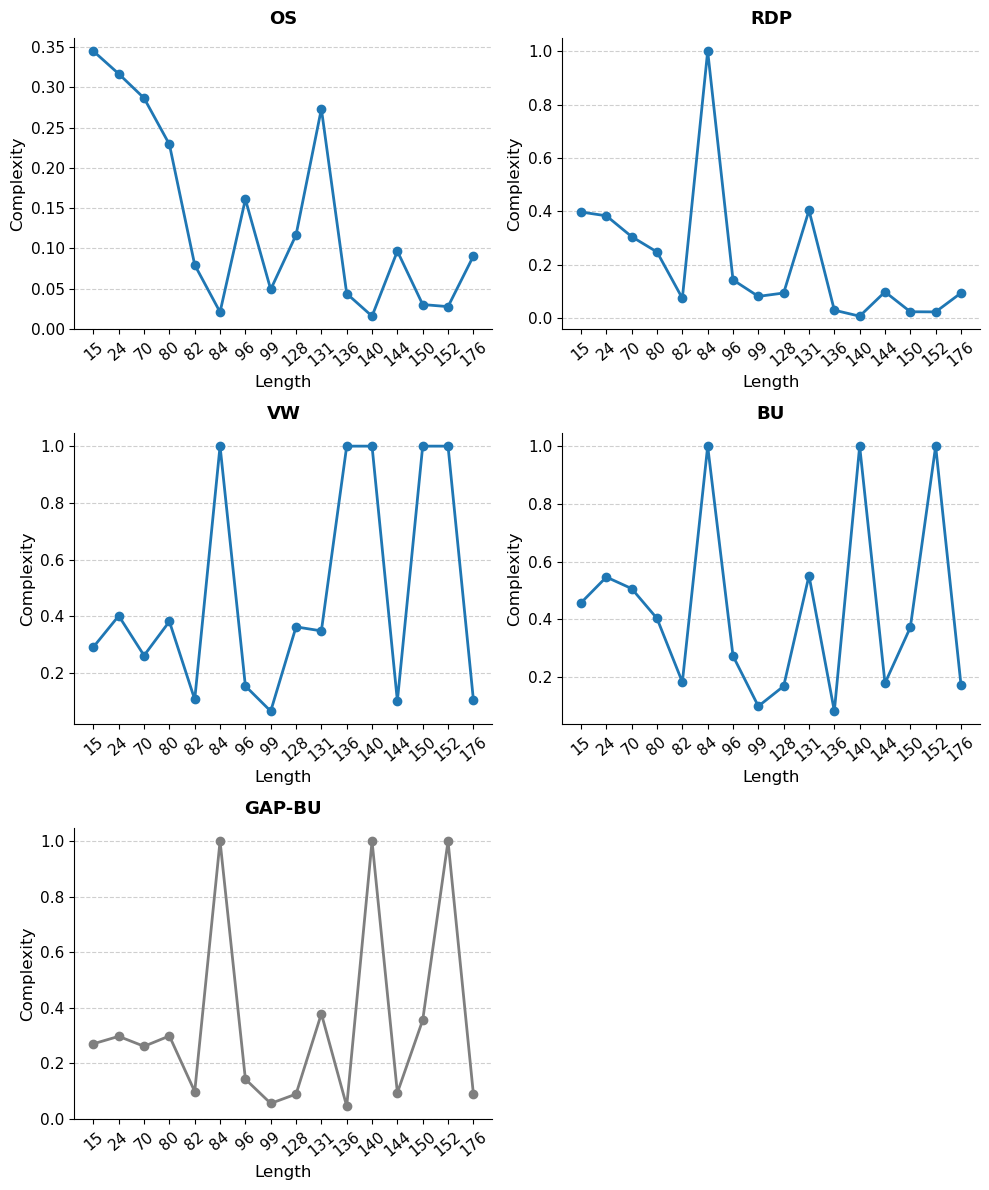

In [364]:
#simp_algs = results_cnn_class["simp_algorithm"].unique()
simp_algs = ['OS', 'RDP', 'VW', 'BU_2', 'BU_1']

num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_cnn_alg_length_mean_comp[alg]
    x_values = [str(value) for value in simp_alg_data.index.tolist()]
    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    if alg == 'BU_1':
        ax.plot(x_values, y_values, marker='o', color='C7', linewidth=2)
    else:
        ax.plot(x_values, y_values, marker='o', color='C0', linewidth=2)

    if alg == 'BU_2':
        alg = 'BU'
    elif alg == 'BU_1':
        alg = 'GAP-BU'

    ax.set_title(f'{alg.upper()}', fontsize=13, fontweight='bold', pad=10)
    ax.set_xlabel('Length', fontsize=12)
    ax.set_ylabel('Complexity', fontsize=12)
    #ax.set_ylim(0.5, 1.0)
    
    
    ax.tick_params(axis='x', rotation=40, labelsize=11)
    ax.tick_params(axis='y', labelsize=11)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    #for x, y in zip(x_values, y_values):
    #    ax.annotate(f"{y:.2f}", (x, y), textcoords="offset points", xytext=(0,8),ha='center', fontsize=10)

#fig.suptitle("Performance per Simplification Algorithm per Length for CNN", fontsize=16, weight='bold', y=1.02)
plt.tight_layout()
plt.show()

### By Stationarity

In [365]:
dataset_stat = metadata[["dataset", "Stationary"]].to_dict()
dataset_stat_dict = pd.Series(metadata["Stationary"].values, index=metadata["dataset"].values).to_dict()
results_cnn_stat = results_cnn
results_cnn_stat["stationary"] = results_cnn_stat["dataset"].map(dataset_stat_dict).copy()

results_cnn_alg_stat_mean = results_cnn_stat.groupby(["simp_algorithm", "stationary"])["performance"].mean()

/tmp/ipykernel_43419/961333341.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_cnn_stat["stationary"] = results_cnn_stat["dataset"].map(dataset_stat_dict).copy()


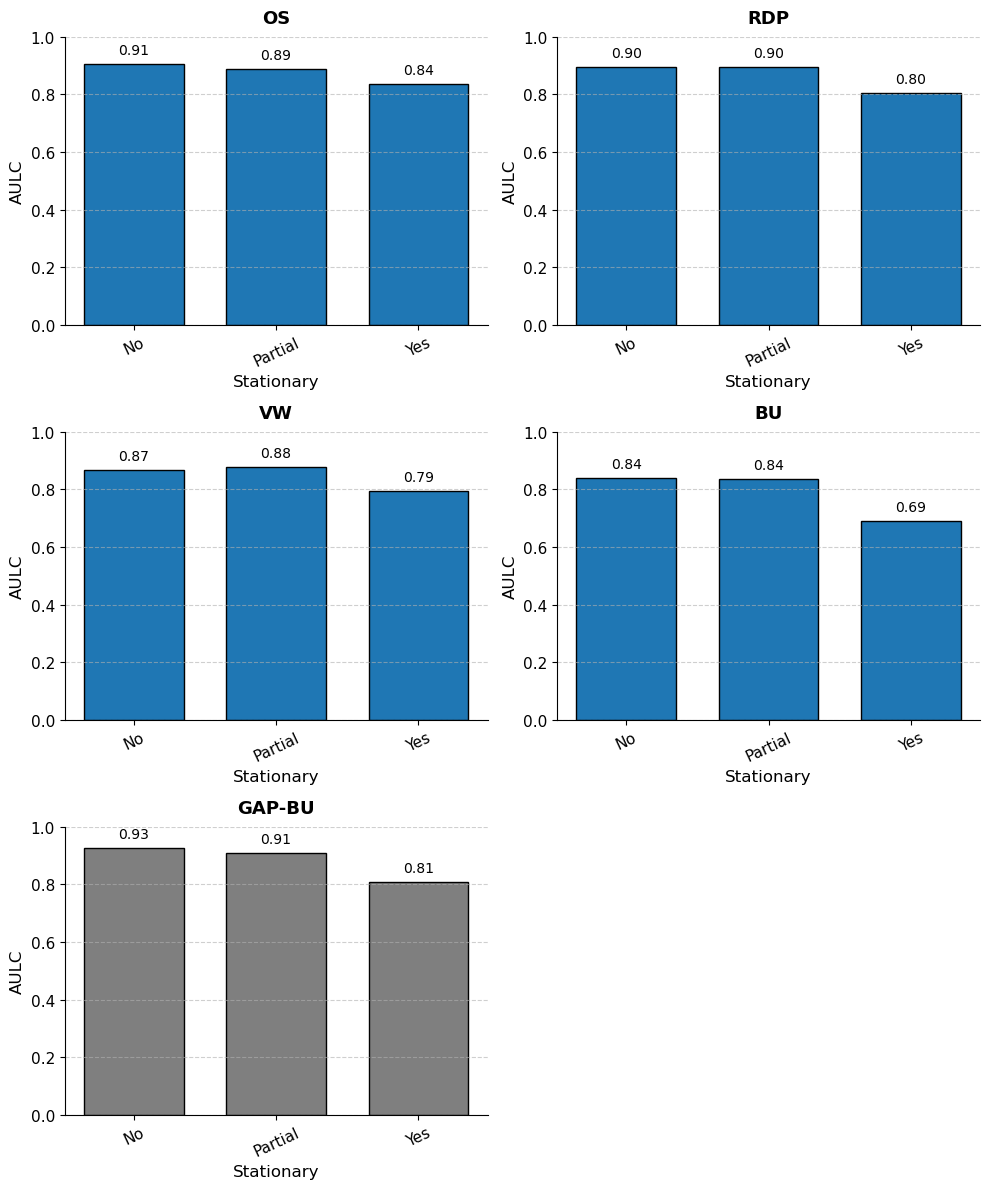

In [366]:
#simp_algs = results_cnn_class["simp_algorithm"].unique()
simp_algs = ['OS', 'RDP', 'VW', 'BU_2', 'BU_1']

num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_cnn_alg_stat_mean[alg]
    x_values = [str(value) for value in simp_alg_data.index.tolist()]
    x_values = ['Yes' if x.lower() == 'true' else 'No' if x.lower() == 'false' else x for x in x_values]
    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    if alg == 'BU_1':
        bars = ax.bar(x_values, y_values, color='C7', edgecolor='black', width=0.7)
    else:
        bars = ax.bar(x_values, y_values, color='C0', edgecolor='black', width=0.7)

    if alg == 'BU_2':
        alg = 'BU'
    elif alg == 'BU_1':
        alg = 'GAP-BU'

    ax.set_title(f'{alg.upper()}', fontsize=13, fontweight='bold', pad=10)
    ax.set_xlabel('Stationary', fontsize=12)
    ax.set_ylabel('AULC', fontsize=12)
    ax.set_ylim(0.0, 1.0)
    ax.tick_params(axis='x', rotation=25, labelsize=11)
    ax.tick_params(axis='y', labelsize=11)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Annotate bars
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height:.2f}", 
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 5), textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)
        
plt.tight_layout()
plt.savefig("../plots/mean_auc_stationary_cnn.png")
plt.show()

By Loyalty Threshold

In [367]:
results_cnn_alg_stat_mean_comp = results_cnn_stat.groupby(["simp_algorithm", "stationary"])["comp@loy=0.8"].mean()

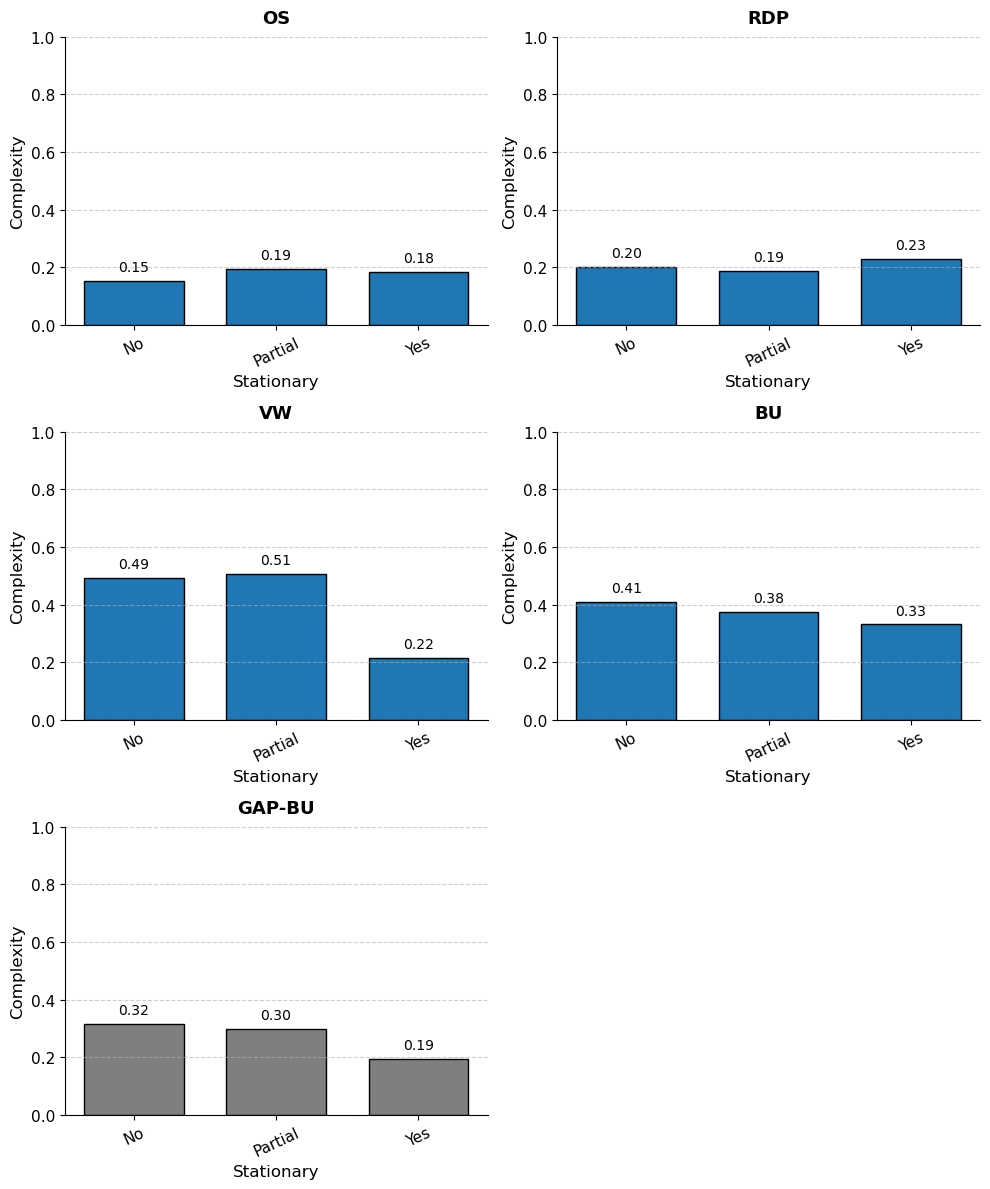

In [368]:
#simp_algs = results_cnn_class["simp_algorithm"].unique()
simp_algs = ['OS', 'RDP', 'VW', 'BU_2', 'BU_1']

num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_cnn_alg_stat_mean_comp[alg]
    x_values = [str(value) for value in simp_alg_data.index.tolist()]
    x_values = ['Yes' if x.lower() == 'true' else 'No' if x.lower() == 'false' else x for x in x_values]
    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    if alg == 'BU_1':
        bars = ax.bar(x_values, y_values, color='C7', edgecolor='black', width=0.7)
    else:
        bars = ax.bar(x_values, y_values, color='C0', edgecolor='black', width=0.7)

    if alg == 'BU_2':
        alg = 'BU'
    elif alg == 'BU_1':
        alg = 'GAP-BU'

    ax.set_title(f'{alg.upper()}', fontsize=13, fontweight='bold', pad=10)
    ax.set_xlabel('Stationary', fontsize=12)
    ax.set_ylabel('Complexity', fontsize=12)
    ax.set_ylim(0.0, 1.0)
    ax.tick_params(axis='x', rotation=25, labelsize=11)
    ax.tick_params(axis='y', labelsize=11)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Annotate bars
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height:.2f}", 
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 5), textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)
        
plt.tight_layout()
plt.savefig("../plots/mean_auc_stationary_cnn.png")
plt.show()

### By Seasonality

In [369]:
dataset_season = metadata[["dataset", "Seasonal"]].to_dict()
dataset_season_dict = pd.Series(metadata["Seasonal"].values, index=metadata["dataset"].values).to_dict()
results_cnn_season = results_cnn
results_cnn_season["seasonal"] = results_cnn_season["dataset"].map(dataset_season_dict).copy()

results_cnn_alg_season_mean = results_cnn_season.groupby(["simp_algorithm", "seasonal"])["performance"].mean()

/tmp/ipykernel_43419/36910846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_cnn_season["seasonal"] = results_cnn_season["dataset"].map(dataset_season_dict).copy()


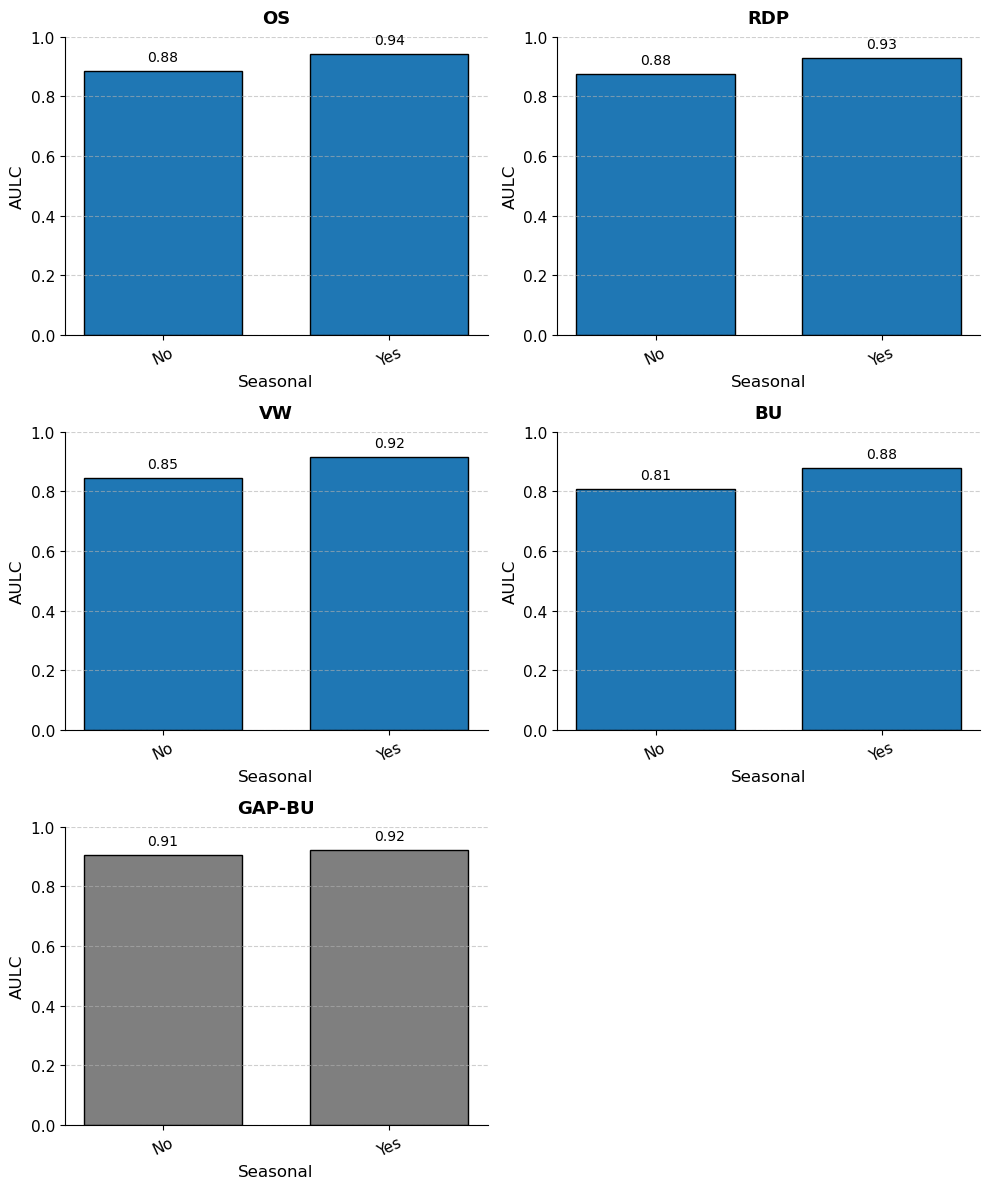

In [370]:
#simp_algs = results_cnn_class["simp_algorithm"].unique()
simp_algs = ['OS', 'RDP', 'VW', 'BU_2', 'BU_1']

num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_cnn_alg_season_mean[alg]
    
    x_values = [str(value) for value in simp_alg_data.index.tolist()]
    x_values = ['Yes' if x.lower() == 'true' 
                else 'No' if x.lower() == 'false' 
                else x.title() for x in x_values]

    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    if alg == 'BU_1':
        bars = ax.bar(x_values, y_values, color='C7', edgecolor='black', width=0.7)
    else:
        bars = ax.bar(x_values, y_values, color='C0', edgecolor='black', width=0.7)

    if alg == 'BU_2':
        alg = 'BU'
    elif alg == 'BU_1':
        alg = 'GAP-BU'

    ax.set_title(f'{alg.upper()}', fontsize=13, fontweight='bold', pad=10)
    ax.set_xlabel('Seasonal', fontsize=12)
    ax.set_ylabel('AULC', fontsize=12)
    ax.set_ylim(0.0, 1.0)
    ax.tick_params(axis='x', rotation=25, labelsize=11)
    ax.tick_params(axis='y', labelsize=11)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Annotate bars with values
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height:.2f}", 
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 5), textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig("../plots/mean_auc_seasonality_cnn.png")
plt.show()


By Loyalty Threshold

In [371]:
results_cnn_alg_season_mean_comp = results_cnn_season.groupby(["simp_algorithm", "seasonal"])["comp@loy=0.8"].mean()

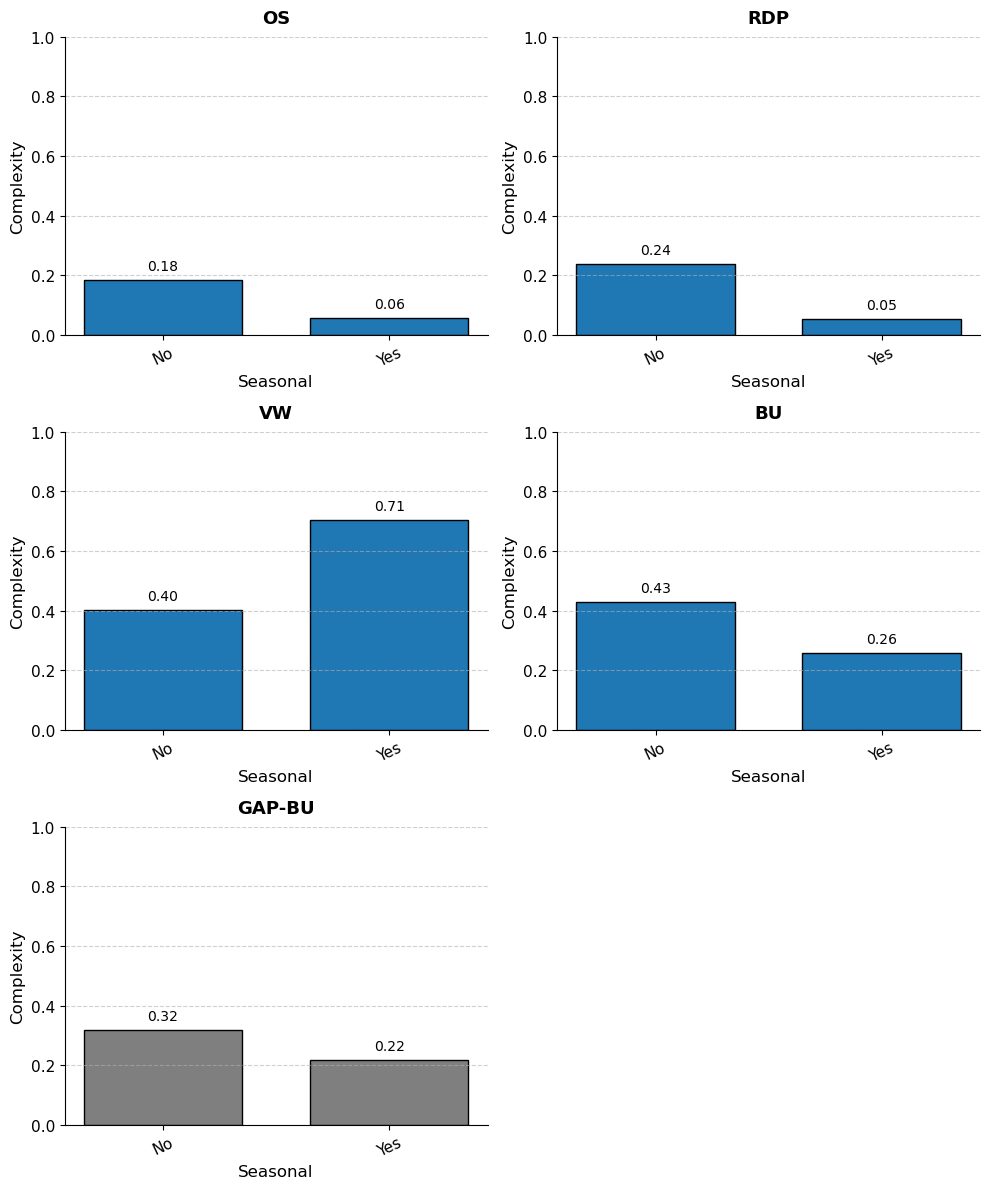

In [372]:
#simp_algs = results_cnn_class["simp_algorithm"].unique()
simp_algs = ['OS', 'RDP', 'VW', 'BU_2', 'BU_1']

num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_cnn_alg_season_mean_comp[alg]
    
    x_values = [str(value) for value in simp_alg_data.index.tolist()]
    x_values = ['Yes' if x.lower() == 'true' 
                else 'No' if x.lower() == 'false' 
                else x.title() for x in x_values]

    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    if alg == 'BU_1':
        bars = ax.bar(x_values, y_values, color='C7', edgecolor='black', width=0.7)
    else:
        bars = ax.bar(x_values, y_values, color='C0', edgecolor='black', width=0.7)

    if alg == 'BU_2':
        alg = 'BU'
    elif alg == 'BU_1':
        alg = 'GAP-BU'

    ax.set_title(f'{alg.upper()}', fontsize=13, fontweight='bold', pad=10)
    ax.set_xlabel('Seasonal', fontsize=12)
    ax.set_ylabel('Complexity', fontsize=12)
    ax.set_ylim(0.0, 1.0)
    ax.tick_params(axis='x', rotation=25, labelsize=11)
    ax.tick_params(axis='y', labelsize=11)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Annotate bars with values
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height:.2f}", 
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 5), textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig("../plots/mean_auc_seasonality_cnn.png")
plt.show()


### By Entropy

In [373]:
metadata["Entropy_bins"] = pd.qcut(metadata["Entropy"], q=3, labels=[0,1,2])

In [374]:
dataset_entropy = metadata[["dataset", "Entropy_bins"]].to_dict()
dataset_entropy_dict = pd.Series(metadata["Entropy_bins"].values, index=metadata["dataset"].values).to_dict()
results_cnn_entropy = results_cnn
results_cnn_entropy["entropy"] = results_cnn_entropy["dataset"].map(dataset_entropy_dict).copy()

results_cnn_alg_entropy_mean = results_cnn_entropy.groupby(["simp_algorithm", "entropy"])["performance"].mean()

/tmp/ipykernel_43419/4068135905.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_cnn_entropy["entropy"] = results_cnn_entropy["dataset"].map(dataset_entropy_dict).copy()


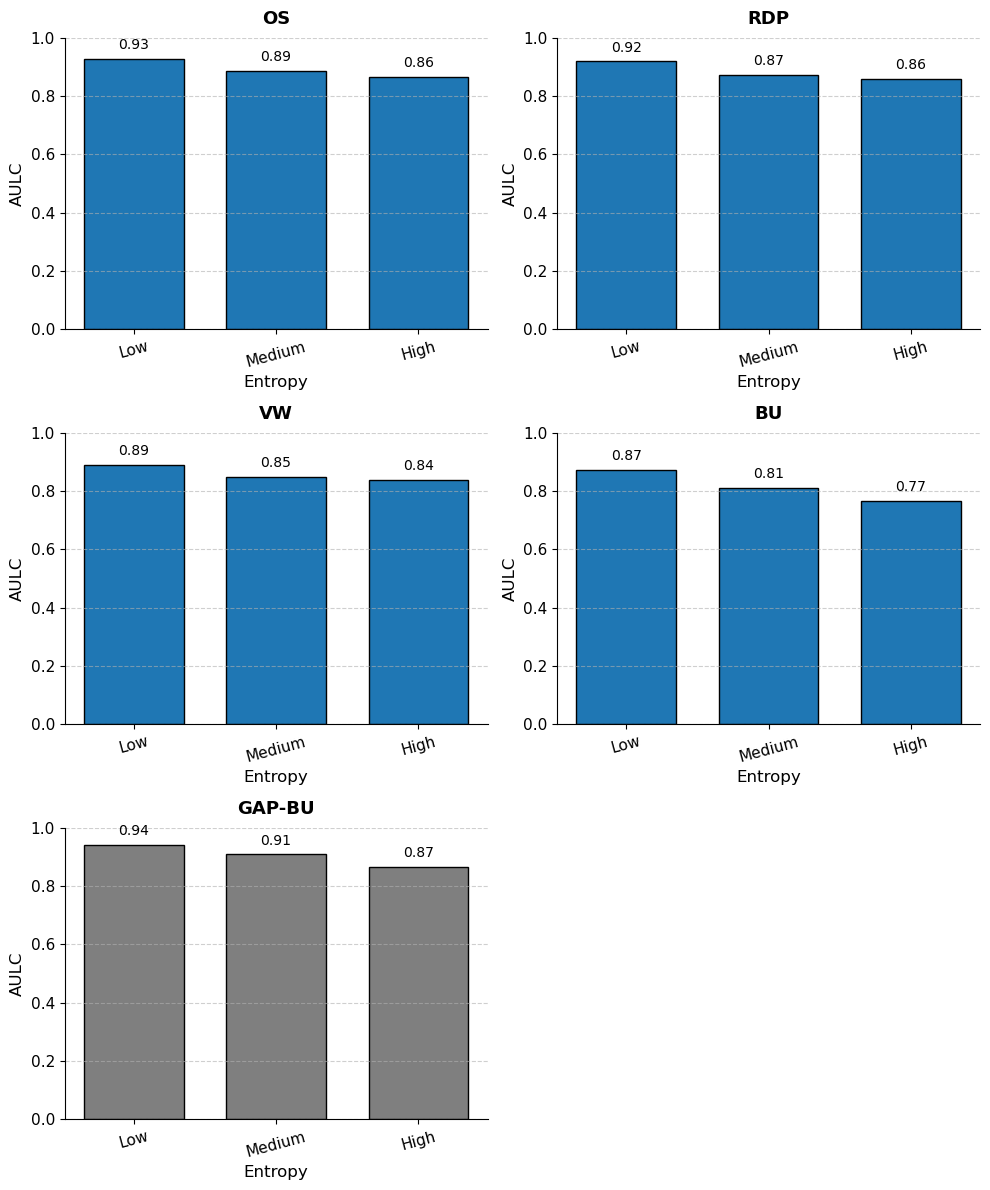

In [375]:
#simp_algs = results_cnn_class["simp_algorithm"].unique()
simp_algs = ['OS', 'RDP', 'VW', 'BU_2', 'BU_1']

num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

entropy_labels = ["Low", "Medium", "High"]

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_cnn_alg_entropy_mean[alg]
    x_values = list(simp_alg_data.index)
    tick_positions = [int(x) for x in x_values]
    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    if alg == 'BU_1':
        bars = ax.bar(tick_positions, y_values, color='C7', edgecolor='black', width=0.7)
    else:
        bars = ax.bar(tick_positions, y_values, color='C0', edgecolor='black', width=0.7)

    if alg == 'BU_2':
        alg = 'BU'
    elif alg == 'BU_1':
        alg = 'GAP-BU'

    ax.set_title(f'{alg.upper()}', fontsize=13, fontweight='bold', pad=10)
    ax.set_xlabel('Entropy', fontsize=12)
    ax.set_ylabel('AULC', fontsize=12)
    ax.set_ylim(0.0, 1.0)
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(entropy_labels)
    ax.tick_params(axis='x', labelsize=11, rotation=15)
    ax.tick_params(axis='y', labelsize=11)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height:.2f}", 
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 5), textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)
        
plt.tight_layout()
plt.savefig("../plots/mean_auc_entropy_cnn.png")
plt.show()


By Loyalty Threshold

In [376]:
results_cnn_alg_entropy_mean_comp = results_cnn_entropy.groupby(["simp_algorithm", "entropy"])["comp@loy=0.8"].mean()

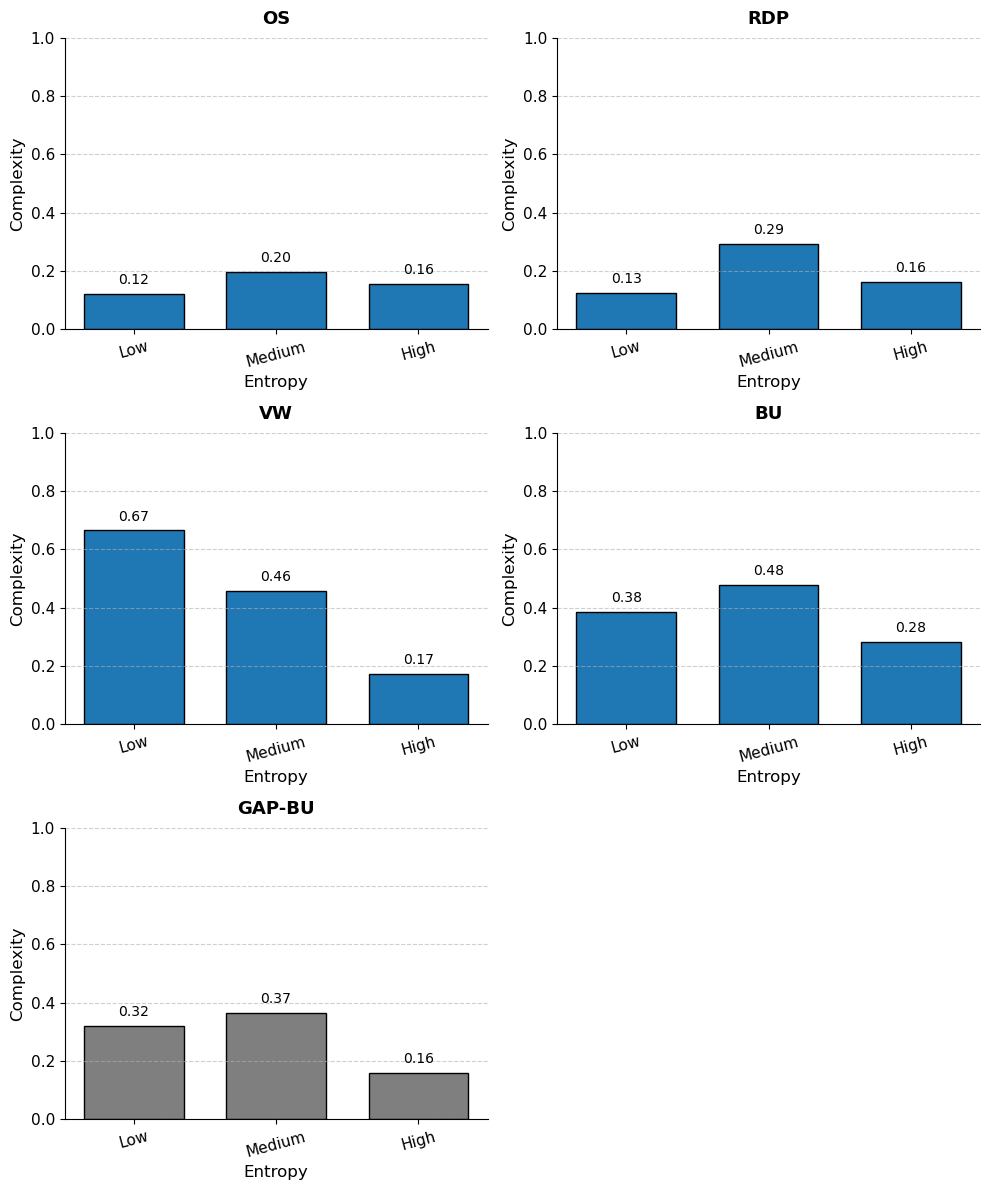

In [377]:
#simp_algs = results_cnn_class["simp_algorithm"].unique()
simp_algs = ['OS', 'RDP', 'VW', 'BU_2', 'BU_1']

num_cols = 2
num_rows = (len(set(simp_algs)) + 1)//2
fig = plt.figure(figsize=(5*num_cols, 4*num_rows))

entropy_labels = ["Low", "Medium", "High"]

for i, alg in enumerate(simp_algs):
    simp_alg_data = results_cnn_alg_entropy_mean_comp[alg]
    x_values = list(simp_alg_data.index)
    tick_positions = [int(x) for x in x_values]
    y_values = simp_alg_data.values.tolist()

    ax = fig.add_subplot(num_rows, num_cols, i+1)
    if alg == 'BU_1':
        bars = ax.bar(tick_positions, y_values, color='C7', edgecolor='black', width=0.7)
    else:
        bars = ax.bar(tick_positions, y_values, color='C0', edgecolor='black', width=0.7)

    if alg == 'BU_2':
        alg = 'BU'
    elif alg == 'BU_1':
        alg = 'GAP-BU'

    ax.set_title(f'{alg.upper()}', fontsize=13, fontweight='bold', pad=10)
    ax.set_xlabel('Entropy', fontsize=12)
    ax.set_ylabel('Complexity', fontsize=12)
    ax.set_ylim(0.0, 1.0)
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(entropy_labels)
    ax.tick_params(axis='x', labelsize=11, rotation=15)
    ax.tick_params(axis='y', labelsize=11)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height:.2f}", 
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 5), textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)
        
plt.tight_layout()
plt.savefig("../plots/mean_auc_entropy_cnn.png")
plt.show()


### Combined Properties

In [378]:
results_cnn_best_case = results_cnn.query(f"class_type == 'binary' & stationary == 'False' & seasonal == True & entropy == 0")
results_cnn_best_case

,dataset,model,simp_algorithm,performance,comp@loy=0.8,time,class,class_type,length,stationary,seasonal,entropy
144,GunPointAgeSpan,cnn,OS,0.98,0.03,0.0,2,binary,150,False,True,0
145,GunPointAgeSpan,cnn,RDP,0.98,0.02,0.0,2,binary,150,False,True,0
146,GunPointAgeSpan,cnn,VW,0.96,1.0,0.0,2,binary,150,False,True,0
147,GunPointAgeSpan,cnn,BU_1,0.99,0.02,0.0,2,binary,150,False,True,0
148,GunPointAgeSpan,cnn,BU_2,0.96,0.03,0.0,2,binary,150,False,True,0
164,GunPointOldVersusYoung,cnn,OS,0.98,0.02,0.0,2,binary,150,False,True,0
165,GunPointOldVersusYoung,cnn,RDP,0.99,0.01,0.0,2,binary,150,False,True,0
166,GunPointOldVersusYoung,cnn,VW,0.96,1.0,0.0,2,binary,150,False,True,0
167,GunPointOldVersusYoung,cnn,BU_1,0.99,1.0,0.0,2,binary,150,False,True,0
168,GunPointOldVersusYoung,cnn,BU_2,0.97,1.0,0.0,2,binary,150,False,True,0


In [379]:
auc_perf = np.array([round(result*100,2) for result in results_cnn_best_case["performance"].to_list()])
simp_alg = results_cnn_best_case["simp_algorithm"].unique()
auc_perf = np.array_split(auc_perf, 2)
datasets = results_cnn_best_case["dataset"].unique()

best_resulting_table = pd.DataFrame(auc_perf, columns=simp_alg, index=datasets)
best_resulting_table.loc["Mean"] = best_resulting_table.select_dtypes(include=['number']).mean()
best_resulting_table

,OS,RDP,VW,BU_1,BU_2
GunPointAgeSpan,97.65,97.61,95.57,98.67,95.83
GunPointOldVersusYoung,97.65,98.64,95.59,99.41,97.35
Mean,97.65,98.12,95.58,99.04,96.59


## Overall Tale

In [385]:
#results_cnn_alg_stat_mean

def dataframe_to_dict(df: pd.DataFrame, cls, add_string:str = "", as_percentage: bool = True) -> dict:
    df_dict = df.to_dict()
    assert type(list(df_dict.keys())[0][1]) == type(cls), f"cls not matching types {type(list(df_dict.keys())[0][1])}, {type(cls)}"
    if as_percentage:
        cls_dict = {key[0]:round(df_dict[key]*100,2) for key in df_dict if key[1] == cls}
    else:
        cls_dict = {key[0]:round(df_dict[key],2) for key in df_dict if key[1] == cls}
    cls_dict["metric"] = add_string
    return cls_dict

In [381]:
rows = []
mean_auc_cnn_perc = [value*100 for value in mean_auc_cnn]
mean = dict(zip(["metric","OS", "RDP", "BU_1", "BU_2", "VW"], ["Mean"]+ mean_auc_cnn_perc))
rows.append(mean)

class_dict_bin = dataframe_to_dict(results_cnn_alg_bin_vs_mc_mean, "binary", "Binary")
rows.append(class_dict_bin)
class_dict_mc = dataframe_to_dict(results_cnn_alg_bin_vs_mc_mean, "multiclass", "Multiclass")
rows.append(class_dict_mc)

stat_dict_true = dataframe_to_dict(results_cnn_alg_stat_mean, "True", "Stationary")
rows.append(stat_dict_true)
stat_dict_false = dataframe_to_dict(results_cnn_alg_stat_mean, "False", "Non-Stationary")
rows.append(stat_dict_false)
stat_dict_partial = dataframe_to_dict(results_cnn_alg_stat_mean, "Partial", "Partially-Stational")
rows.append(stat_dict_partial)

ses_dict_true = dataframe_to_dict(results_cnn_alg_season_mean, True, "Seasonal")
rows.append(ses_dict_true)
ses_dict_false = dataframe_to_dict(results_cnn_alg_season_mean, False, "Non-Seasonal")
rows.append(ses_dict_false)

entropy_dict_true = dataframe_to_dict(results_cnn_alg_entropy_mean, 0, "Low_Entropy")
rows.append(entropy_dict_true)
entropy_dict_false = dataframe_to_dict(results_cnn_alg_entropy_mean, 1, "Medium_Entropy")
rows.append(entropy_dict_false)
entropy_dict_partial = dataframe_to_dict(results_cnn_alg_entropy_mean, 2, "High_Entropy")
rows.append(entropy_dict_partial)

pd.set_option('display.precision', 2)

#metrics_df = pd.DataFrame.from_dict(rows).sort_values(by='OS', ascending=False)
metrics_df = pd.DataFrame.from_dict(rows)
metrics_df = metrics_df.set_index('metric')
metrics_df


,OS,RDP,BU_1,BU_2,VW
metric,,,,,
Mean,89.53,88.52,82.07,85.96,90.93
Binary,90.02,89.20,92.72,83.59,86.96
Multiclass,89.16,87.98,89.53,80.89,85.18
Stationary,83.72,80.35,80.71,69.10,79.31
Non-Stationary,90.53,89.70,92.58,83.97,86.82
Partially-Stational,88.96,89.51,90.82,83.52,87.72
Seasonal,94.26,92.86,92.23,87.99,91.54
Non-Seasonal,88.44,87.51,90.63,80.70,84.68
Low_Entropy,92.83,91.91,94.16,87.21,89.01


In [386]:
rows = []
mean_comp_cnn_perc = mean_comp_cnn
#mean_comp_cnn_perc = [value*100 for value in mean_comp_cnn]
mean = dict(zip(["metric","OS", "RDP", "BU_1", "BU_2", "VW"], ["Mean"]+ mean_comp_cnn_perc))
rows.append(mean)


class_dict_bin_comp = dataframe_to_dict(results_cnn_alg_bin_vs_mc_mean_comp, "binary", "Binary", as_percentage=False)
rows.append(class_dict_bin_comp)
class_dict_mc_comp = dataframe_to_dict(results_cnn_alg_bin_vs_mc_mean_comp, "multiclass", "Multiclass", as_percentage=False)
rows.append(class_dict_mc_comp)

stat_dict_true_comp = dataframe_to_dict(results_cnn_alg_stat_mean_comp, "True", "Stationary", as_percentage=False)
rows.append(stat_dict_true_comp)
stat_dict_false_comp = dataframe_to_dict(results_cnn_alg_stat_mean_comp, "False", "Non-Stationary", as_percentage=False)
rows.append(stat_dict_false_comp)
stat_dict_partial_comp = dataframe_to_dict(results_cnn_alg_stat_mean_comp, "Partial", "Partially-Stational", as_percentage=False)
rows.append(stat_dict_partial_comp)

ses_dict_true_comp = dataframe_to_dict(results_cnn_alg_season_mean_comp, True, "Seasonal", as_percentage=False)
rows.append(ses_dict_true_comp)
ses_dict_false_comp = dataframe_to_dict(results_cnn_alg_season_mean_comp, False, "Non-Seasonal", as_percentage=False)
rows.append(ses_dict_false_comp)

entropy_dict_true_comp = dataframe_to_dict(results_cnn_alg_entropy_mean_comp, 0, "Low_Entropy", as_percentage=False)
rows.append(entropy_dict_true_comp)
entropy_dict_false_comp = dataframe_to_dict(results_cnn_alg_entropy_mean_comp, 1, "Medium_Entropy", as_percentage=False)
rows.append(entropy_dict_false_comp)
entropy_dict_partial_comp = dataframe_to_dict(results_cnn_alg_entropy_mean_comp, 2, "High_Entropy", as_percentage=False)
rows.append(entropy_dict_partial_comp)

#pd.set_option('display.precision', 2)

#metrics_df = pd.DataFrame.from_dict(rows).sort_values(by='OS', ascending=False)
metrics_df = pd.DataFrame.from_dict(rows)
metrics_df = metrics_df.set_index('metric')
metrics_df


,OS,RDP,BU_1,BU_2,VW
metric,,,,,
Mean,0.16,0.20,0.30,0.40,0.46
Binary,0.17,0.26,0.41,0.51,0.56
Multiclass,0.15,0.16,0.21,0.31,0.38
Stationary,0.18,0.23,0.19,0.33,0.22
Non-Stationary,0.15,0.20,0.32,0.41,0.49
Partially-Stational,0.19,0.19,0.30,0.38,0.51
Seasonal,0.06,0.05,0.22,0.26,0.71
Non-Seasonal,0.18,0.24,0.32,0.43,0.40
Low_Entropy,0.12,0.13,0.32,0.38,0.67
